In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import urllib
%matplotlib inline

/Users/irisz/env/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/irisz/env/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
path = r'../data/carvana/'
all_files = glob.glob(path + "/*.xlsx")

li = []
for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33328 entries, 0 to 33327
Data columns (total 8 columns):
Unnamed: 0    33328 non-null int64
make          33328 non-null object
model         33328 non-null object
trim          33328 non-null object
type          33328 non-null object
price         33328 non-null object
mileage       33328 non-null object
src           33328 non-null object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


In [4]:
df.head()

,Unnamed: 0,make,model,trim,type,price,mileage,src
0,0,x,x,x,x,x,x,x
1,1,2015 AUDI,A3,1.8T Premium Plus,convertible,"22,200","41,822 miles",//cdnblob.carvana.io/2000291164/post-large/nor...
2,2,2011 JAGUAR,XK,XKR,convertible,"34,300","47,179 miles",//cdnblob.carvana.io/2000287619/post-large/nor...
3,3,2017 MAZDA,MX-5 MIATA RF,Club,convertible,"25,700","6,445 miles",//cdnblob.carvana.io/2000282627/post-large/nor...
4,4,2016 BMW,4 SERIES,428i,convertible,"32,800","17,869 miles",//cdnblob.carvana.io/2000283685/post-large/nor...


In [5]:
df = df.drop(np.array(df[df.make == 'x'].index))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33309 entries, 1 to 33327
Data columns (total 8 columns):
Unnamed: 0    33309 non-null int64
make          33309 non-null object
model         33309 non-null object
trim          33309 non-null object
type          33309 non-null object
price         33309 non-null object
mileage       33309 non-null object
src           33309 non-null object
dtypes: int64(1), object(7)
memory usage: 2.3+ MB


In [7]:
df['price'] = df['price'].apply(lambda x: int(x.replace(',','')))
df['mileage'] = df['mileage'].apply(lambda x: int(x.replace(',','').replace(' miles','')))
df['src'] = df['src'].apply(lambda x: x.lstrip('/'))

In [8]:
df.head()

,Unnamed: 0,make,model,trim,type,price,mileage,src
1,1,2015 AUDI,A3,1.8T Premium Plus,convertible,22200,41822,cdnblob.carvana.io/2000291164/post-large/norma...
2,2,2011 JAGUAR,XK,XKR,convertible,34300,47179,cdnblob.carvana.io/2000287619/post-large/norma...
3,3,2017 MAZDA,MX-5 MIATA RF,Club,convertible,25700,6445,cdnblob.carvana.io/2000282627/post-large/norma...
4,4,2016 BMW,4 SERIES,428i,convertible,32800,17869,cdnblob.carvana.io/2000283685/post-large/norma...
5,5,2015 BMW,Z4,SDrive35i,convertible,32700,29380,cdnblob.carvana.io/2000277443/post-large/norma...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33309 entries, 1 to 33327
Data columns (total 8 columns):
Unnamed: 0    33309 non-null int64
make          33309 non-null object
model         33309 non-null object
trim          33309 non-null object
type          33309 non-null object
price         33309 non-null int64
mileage       33309 non-null int64
src           33309 non-null object
dtypes: int64(3), object(5)
memory usage: 2.3+ MB


In [10]:
all_cars = df.drop_duplicates()

In [11]:
all_cars['year'] = all_cars['make'].apply(lambda x: int(x.split()[0]))

/Users/irisz/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
all_cars['make'] = all_cars['make'].apply(lambda x: x.split(' ', 1)[1])

/Users/irisz/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
all_cars = all_cars.reset_index()
all_cars.drop(['index'],axis=1, inplace=True)

In [14]:
def is_valid_url(url):
    index = url.find('carvana')
    return index >= 0

In [15]:
invalid_urls = []
for i in range(len(all_cars.iloc[:]['src'])):
    if not is_valid_url(all_cars.iloc[i]['src']):
        invalid_urls.append(i)

In [16]:
all_cars.drop(invalid_urls, inplace=True)

In [17]:
all_cars = all_cars.reset_index()
all_cars.drop(['index'],axis=1, inplace=True)

In [18]:
all_cars.replace({'make': 'MERCEDES-BEN...'}, 'MERCEDES-BENZ',inplace=True)

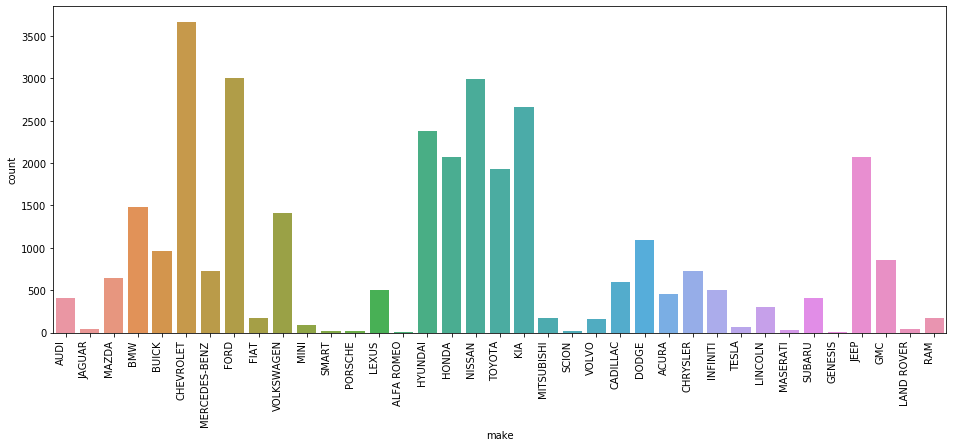

In [19]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='make', data=all_cars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

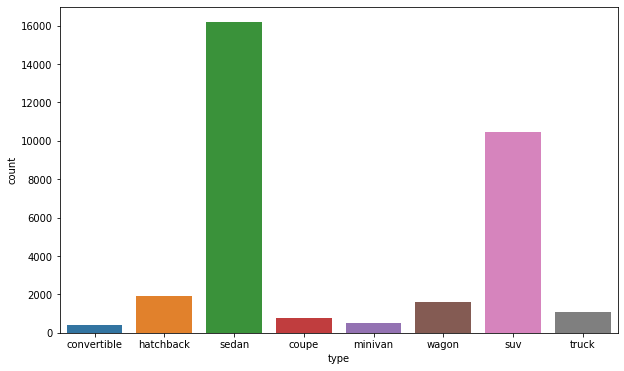

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=all_cars)

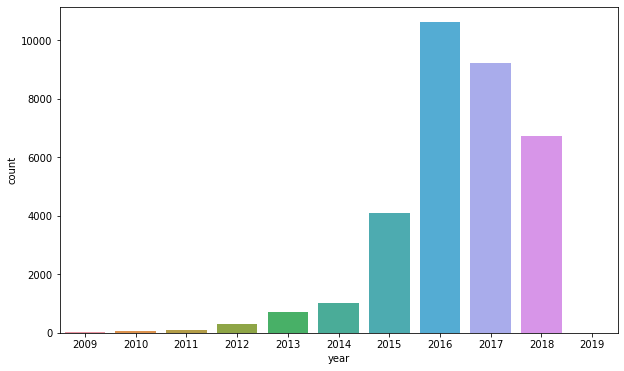

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=all_cars)

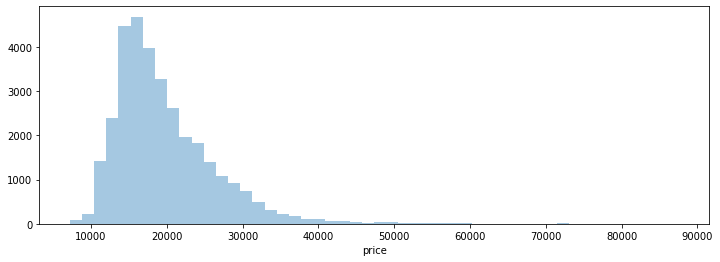

In [22]:
plt.figure(figsize=(12,4))
sns.distplot((all_cars['price']), kde=False)

In [23]:
def is_original(url):
    if url.find('.png') >= 0:
        return 'sample'
    else:
        return 'original'

originals = []    
for url in all_cars.iloc[:]['src']:
    originals.append(is_original(url))

In [24]:
all_cars['image-type'] = originals

In [25]:
all_cars.head()

,Unnamed: 0,make,model,trim,type,price,mileage,src,year,image-type
0,1,AUDI,A3,1.8T Premium Plus,convertible,22200,41822,cdnblob.carvana.io/2000291164/post-large/norma...,2015,original
1,2,JAGUAR,XK,XKR,convertible,34300,47179,cdnblob.carvana.io/2000287619/post-large/norma...,2011,original
2,3,MAZDA,MX-5 MIATA RF,Club,convertible,25700,6445,cdnblob.carvana.io/2000282627/post-large/norma...,2017,original
3,4,BMW,4 SERIES,428i,convertible,32800,17869,cdnblob.carvana.io/2000283685/post-large/norma...,2016,original
4,5,BMW,Z4,SDrive35i,convertible,32700,29380,cdnblob.carvana.io/2000277443/post-large/norma...,2015,original


In [26]:
len(all_cars[all_cars['image-type'] == 'sample']) #There are 120 sample photos found in our data

177

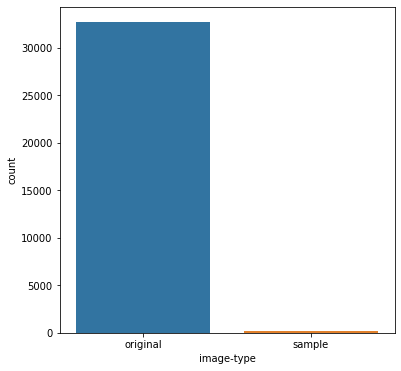

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='image-type', data=all_cars)

In [28]:
all_cars.to_csv('../final_data.csv')

In [ ]:
urllib.request.urlretrieve('https://' + all_cars.iloc[0]['src'], "../images/" + str(0) + ".jpg")

In [29]:
urls = all_cars.iloc[:]['src']
print(len(urls))

32888


In [ ]:
for i in range(18207, len(urls)):
    image_file_path = "../images/carvana/" + str(i) + ".jpg"
    print(image_file_path)
    print('https://' + urls[i])
    urllib.request.urlretrieve('https://' + urls[i], "../images/carvana/" + str(i) + ".jpg")

../images/carvana/18207.jpg
https://cdnblob.carvana.io/2000269980/post-large/normalized/cropped/2000269980-edc-02.jpg?v=2019.4.2_14.8.44
../images/carvana/18208.jpg
https://cdnblob.carvana.io/2000283369/post-large/normalized/cropped/2000283369-edc-02.jpg?v=2019.4.4_1.10.32
../images/carvana/18209.jpg
https://cdnblob.carvana.io/2000281480/post-large/normalized/cropped/2000281480-edc-02.jpg?v=2019.4.4_16.9.10
../images/carvana/18210.jpg
https://cdnblob.carvana.io/2000280547/post-large/normalized/cropped/2000280547-edc-02.jpg?v=2019.4.12_13.48.26
../images/carvana/18211.jpg
https://cdnblob.carvana.io/2000281491/post-large/normalized/cropped/2000281491-edc-02.jpg?v=2019.4.3_7.51.7
../images/carvana/18212.jpg
https://cdnblob.carvana.io/2000281644/post-large/normalized/cropped/2000281644-edc-02.jpg?v=2019.4.6_6.22.42
../images/carvana/18213.jpg
https://cdnblob.carvana.io/2000281611/post-large/normalized/cropped/2000281611-edc-02.jpg?v=2019.4.11_6.59.42
../images/carvana/18214.jpg
https://cdn

../images/carvana/18267.jpg
https://cdnblob.carvana.io/2000271937/post-large/normalized/cropped/2000271937-edc-02.jpg?v=2019.4.9_0.58.39
../images/carvana/18268.jpg
https://cdnblob.carvana.io/2000278355/post-large/normalized/cropped/2000278355-edc-02.jpg?v=2019.3.25_13.15.40
../images/carvana/18269.jpg
https://cdnblob.carvana.io/2000274325/post-large/normalized/cropped/2000274325-edc-02.jpg?v=2019.3.25_22.0.53
../images/carvana/18270.jpg
https://cdnblob.carvana.io/2000265473/post-large/normalized/cropped/2000265473-edc-02.jpg?v=2019.3.23_7.45.23
../images/carvana/18271.jpg
https://cdnblob.carvana.io/2000270081/post-large/normalized/cropped/2000270081-edc-02.jpg?v=2019.4.5_4.47.29
../images/carvana/18272.jpg
https://cdnblob.carvana.io/2000276698/post-large/normalized/cropped/2000276698-edc-02.jpg?v=2019.3.30_15.2.23
../images/carvana/18273.jpg
https://cdnblob.carvana.io/2000276645/post-large/normalized/cropped/2000276645-edc-02.jpg?v=2019.4.5_16.15.22
../images/carvana/18274.jpg
https:/

../images/carvana/18327.jpg
https://cdnblob.carvana.io/2000272920/post-large/normalized/cropped/2000272920-edc-02.jpg?v=2019.3.22_5.7.19
../images/carvana/18328.jpg
https://cdnblob.carvana.io/2000271315/post-large/normalized/cropped/2000271315-edc-02.jpg?v=2019.3.21_5.23.26
../images/carvana/18329.jpg
https://cdnblob.carvana.io/2000272924/post-large/normalized/cropped/2000272924-edc-02.jpg?v=2019.3.16_13.46.35
../images/carvana/18330.jpg
https://cdnblob.carvana.io/2000270765/post-large/normalized/cropped/2000270765-edc-02.jpg?v=2019.3.15_5.52.59
../images/carvana/18331.jpg
https://cdnblob.carvana.io/2000262414/post-large/normalized/cropped/2000262414-edc-02.jpg?v=2019.4.3_14.55.26
../images/carvana/18332.jpg
https://cdnblob.carvana.io/2000268440/post-large/normalized/cropped/2000268440-edc-02.jpg?v=2019.3.18_19.16.23
../images/carvana/18333.jpg
https://cdnblob.carvana.io/2000265726/post-large/normalized/cropped/2000265726-edc-02.jpg?v=2019.4.8_15.32.33
../images/carvana/18334.jpg
https

../images/carvana/18387.jpg
https://cdnblob.carvana.io/2000264615/post-large/normalized/cropped/2000264615-edc-02.jpg?v=2019.3.14_23.57.21
../images/carvana/18388.jpg
https://cdnblob.carvana.io/2000263951/post-large/normalized/cropped/2000263951-edc-02.jpg?v=2019.3.21_19.1.37
../images/carvana/18389.jpg
https://cdnblob.carvana.io/2000263925/post-large/normalized/cropped/2000263925-edc-02.jpg?v=2019.3.28_4.30.17
../images/carvana/18390.jpg
https://cdnblob.carvana.io/2000263728/post-large/normalized/cropped/2000263728-edc-02.jpg?v=2019.3.28_0.33.6
../images/carvana/18391.jpg
https://cdnblob.carvana.io/2000262000/post-large/normalized/cropped/2000262000-edc-02.jpg?v=2019.4.3_16.34.50
../images/carvana/18392.jpg
https://cdnblob.carvana.io/2000261827/post-large/normalized/cropped/2000261827-edc-02.jpg?v=2019.3.30_14.23.31
../images/carvana/18393.jpg
https://cdnblob.carvana.io/2000261768/post-large/normalized/cropped/2000261768-edc-02.jpg?v=2019.4.1_19.0.28
../images/carvana/18394.jpg
https:

../images/carvana/18447.jpg
https://cdnblob.carvana.io/2000260303/post-large/normalized/cropped/2000260303-edc-02.jpg?v=2019.2.28_19.40.49
../images/carvana/18448.jpg
https://cdnblob.carvana.io/2000258336/post-large/normalized/cropped/2000258336-edc-02.jpg?v=2019.3.1_5.27.27
../images/carvana/18449.jpg
https://cdnblob.carvana.io/2000258332/post-large/normalized/cropped/2000258332-edc-02.jpg?v=2019.3.2_19.31.4
../images/carvana/18450.jpg
https://cdnblob.carvana.io/2000258330/post-large/normalized/cropped/2000258330-edc-02.jpg?v=2019.3.8_4.47.41
../images/carvana/18451.jpg
https://cdnblob.carvana.io/2000256740/post-large/normalized/cropped/2000256740-edc-02.jpg?v=2019.3.11_18.41.1
../images/carvana/18452.jpg
https://cdnblob.carvana.io/2000260961/post-large/normalized/cropped/2000260961-edc-02.jpg?v=2019.2.28_7.54.18
../images/carvana/18453.jpg
https://cdnblob.carvana.io/2000255357/post-large/normalized/cropped/2000255357-edc-02.jpg?v=2019.2.28_8.9.27
../images/carvana/18454.jpg
https://c

../images/carvana/18509.jpg
https://cdnblob.carvana.io/2000254029/post-large/normalized/cropped/2000254029-edc-02.jpg?v=2019.3.14_18.2.9
../images/carvana/18510.jpg
https://cdnblob.carvana.io/2000252966/post-large/normalized/cropped/2000252966-edc-02.jpg?v=2019.3.12_21.46.42
../images/carvana/18511.jpg
https://cdnblob.carvana.io/2000251641/post-large/normalized/cropped/2000251641-edc-02.jpg?v=2019.3.12_7.53.5
../images/carvana/18512.jpg
https://cdnblob.carvana.io/2000252854/post-large/normalized/cropped/2000252854-edc-02.jpg?v=2019.2.22_21.7.6
../images/carvana/18513.jpg
https://cdnblob.carvana.io/2000256066/post-large/normalized/cropped/2000256066-edc-02.jpg?v=2019.2.25_18.50.50
../images/carvana/18514.jpg
https://cdnblob.carvana.io/2000258168/post-large/normalized/cropped/2000258168-edc-02.jpg?v=2019.2.20_21.10.49
../images/carvana/18515.jpg
https://cdnblob.carvana.io/2000245631/post-large/normalized/cropped/2000245631-edc-02.jpg?v=2019.2.27_7.34.21
../images/carvana/18516.jpg
https:

../images/carvana/18571.jpg
https://cdnblob.carvana.io/2000251882/post-large/normalized/cropped/2000251882-edc-02.jpg?v=2019.3.4_15.20.36
../images/carvana/18572.jpg
https://cdnblob.carvana.io/2000248876/post-large/normalized/cropped/2000248876-edc-02.jpg?v=2019.2.22_14.40.59
../images/carvana/18573.jpg
https://cdnblob.carvana.io/2000251651/post-large/normalized/cropped/2000251651-edc-02.jpg?v=2019.2.20_19.38.44
../images/carvana/18574.jpg
https://cdnblob.carvana.io/2000247333/post-large/normalized/cropped/2000247333-edc-02.jpg?v=2019.3.26_4.38.24
../images/carvana/18575.jpg
https://cdnblob.carvana.io/2000250421/post-large/normalized/cropped/2000250421-edc-02.jpg?v=2019.2.26_5.25.23
../images/carvana/18576.jpg
https://cdnblob.carvana.io/2000251550/post-large/normalized/cropped/2000251550-edc-02.jpg?v=2019.2.20_15.59.6
../images/carvana/18577.jpg
https://cdnblob.carvana.io/2000251532/post-large/normalized/cropped/2000251532-edc-02.jpg?v=2019.4.5_19.50.52
../images/carvana/18578.jpg
http

../images/carvana/18631.jpg
https://cdnblob.carvana.io/2000245633/post-large/normalized/cropped/2000245633-edc-02.jpg?v=2019.2.8_23.47.19
../images/carvana/18632.jpg
https://cdnblob.carvana.io/2000243209/post-large/normalized/cropped/2000243209-edc-02.jpg?v=2019.2.14_20.19.55
../images/carvana/18633.jpg
https://cdnblob.carvana.io/2000243637/post-large/normalized/cropped/2000243637-edc-02.jpg?v=2019.2.16_15.57.2
../images/carvana/18634.jpg
https://cdnblob.carvana.io/2000241192/post-large/normalized/cropped/2000241192-edc-02.jpg?v=2019.2.7_4.7.38
../images/carvana/18635.jpg
https://cdnblob.carvana.io/2000242594/post-large/normalized/cropped/2000242594-edc-02.jpg?v=2019.2.6_20.1.34
../images/carvana/18636.jpg
https://cdnblob.carvana.io/2000245565/post-large/normalized/cropped/2000245565-edc-02.jpg?v=2019.2.7_7.31.44
../images/carvana/18637.jpg
https://cdnblob.carvana.io/2000244860/post-large/normalized/cropped/2000244860-edc-02.jpg?v=2019.2.13_14.2.35
../images/carvana/18638.jpg
https://c

../images/carvana/18691.jpg
https://cdnblob.carvana.io/2000221415/post-large/normalized/cropped/2000221415-edc-02.jpg?v=2019.2.7_0.19.45
../images/carvana/18692.jpg
https://cdnblob.carvana.io/2000227128/post-large/normalized/cropped/2000227128-edc-02.jpg?v=2019.2.14_20.17.48
../images/carvana/18693.jpg
https://cdnblob.carvana.io/2000228312/post-large/normalized/cropped/2000228312-edc-02.jpg?v=2019.1.16_16.16.14
../images/carvana/18694.jpg
https://cdnblob.carvana.io/2000225513/post-large/normalized/cropped/2000225513-edc-02.jpg?v=2019.1.16_2.45.42
../images/carvana/18695.jpg
https://cdnblob.carvana.io/2000224818/post-large/normalized/cropped/2000224818-edc-02.jpg?v=2018.12.29_6.21.4
../images/carvana/18696.jpg
https://cdnblob.carvana.io/2000219508/post-large/normalized/cropped/2000219508-edc-02.jpg?v=2018.12.20_23.31.37
../images/carvana/18697.jpg
https://cdnblob.carvana.io/2000221409/post-large/normalized/cropped/2000221409-edc-02.jpg?v=2018.12.20_5.18.55
../images/carvana/18698.jpg
ht

../images/carvana/18751.jpg
https://cdnblob.carvana.io/2000259317/post-large/normalized/cropped/2000259317-edc-02.jpg?v=2019.3.5_18.56.44
../images/carvana/18752.jpg
https://cdnblob.carvana.io/2000261748/post-large/normalized/cropped/2000261748-edc-02.jpg?v=2019.3.5_1.49.28
../images/carvana/18753.jpg
https://cdnblob.carvana.io/2000259023/post-large/normalized/cropped/2000259023-edc-02.jpg?v=2019.3.18_15.22.52
../images/carvana/18754.jpg
https://cdnblob.carvana.io/2000261361/post-large/normalized/cropped/2000261361-edc-02.jpg?v=2019.2.28_6.27.33
../images/carvana/18755.jpg
https://cdnblob.carvana.io/2000254755/post-large/normalized/cropped/2000254755-edc-02.jpg?v=2019.3.1_20.53.33
../images/carvana/18756.jpg
https://cdnblob.carvana.io/2000250573/post-large/normalized/cropped/2000250573-edc-02.jpg?v=2019.2.23_5.10.40
../images/carvana/18757.jpg
https://cdnblob.carvana.io/2000252685/post-large/normalized/cropped/2000252685-edc-02.jpg?v=2019.4.11_4.6.53
../images/carvana/18758.jpg
https:/

../images/carvana/18811.jpg
https://cdnblob.carvana.io/2000192023/post-large/normalized/cropped/2000192023-edc-02.jpg?v=2019.2.2_23.37.30
../images/carvana/18812.jpg
https://cdnblob.carvana.io/2000293860/post-large/normalized/cropped/2000293860-edc-02.jpg?v=2019.4.12_19.29.39
../images/carvana/18813.jpg
https://cdnblob.carvana.io/2000275763/post-large/normalized/cropped/2000275763-edc-02.jpg?v=2019.4.11_22.40.19
../images/carvana/18814.jpg
https://cdnblob.carvana.io/2000291041/post-large/normalized/cropped/2000291041-edc-02.jpg?v=2019.4.11_23.2.22
../images/carvana/18815.jpg
https://cdnblob.carvana.io/2000289895/post-large/normalized/cropped/2000289895-edc-02.jpg?v=2019.4.12_4.4.13
../images/carvana/18816.jpg
https://cdnblob.carvana.io/2000291399/post-large/normalized/cropped/2000291399-edc-02.jpg?v=2019.4.12_8.11.47
../images/carvana/18817.jpg
https://cdnblob.carvana.io/2000290196/post-large/normalized/cropped/2000290196-edc-02.jpg?v=2019.4.11_17.5.24
../images/carvana/18818.jpg
https

../images/carvana/18871.jpg
https://cdnblob.carvana.io/2000283587/post-large/normalized/cropped/2000283587-edc-02.jpg?v=2019.4.12_19.59.52
../images/carvana/18872.jpg
https://cdnblob.carvana.io/2000282364/post-large/normalized/cropped/2000282364-edc-02.jpg?v=2019.4.5_13.18.33
../images/carvana/18873.jpg
https://cdnblob.carvana.io/2000282361/post-large/normalized/cropped/2000282361-edc-02.jpg?v=2019.4.10_10.15.34
../images/carvana/18874.jpg
https://cdnblob.carvana.io/2000275614/post-large/normalized/cropped/2000275614-edc-02.jpg?v=2019.4.11_18.52.31
../images/carvana/18875.jpg
https://cdnblob.carvana.io/2000274026/post-large/normalized/cropped/2000274026-edc-02.jpg?v=2019.4.12_20.3.45
../images/carvana/18876.jpg
https://cdnblob.carvana.io/2000285833/post-large/normalized/cropped/2000285833-edc-02.jpg?v=2019.4.5_7.59.10
../images/carvana/18877.jpg
https://cdnblob.carvana.io/2000273430/post-large/normalized/cropped/2000273430-edc-02.jpg?v=2019.4.12_20.27.2
../images/carvana/18878.jpg
http

../images/carvana/18931.jpg
https://cdnblob.carvana.io/2000279948/post-large/normalized/cropped/2000279948-edc-02.jpg?v=2019.4.12_8.28.26
../images/carvana/18932.jpg
https://cdnblob.carvana.io/2000279463/post-large/normalized/cropped/2000279463-edc-02.jpg?v=2019.4.9_19.1.9
../images/carvana/18933.jpg
https://cdnblob.carvana.io/2000275536/post-large/normalized/cropped/2000275536-edc-02.jpg?v=2019.4.9_11.30.29
../images/carvana/18934.jpg
https://cdnblob.carvana.io/2000274416/post-large/normalized/cropped/2000274416-edc-02.jpg?v=2019.4.10_20.6.46
../images/carvana/18935.jpg
https://cdnblob.carvana.io/2000279878/post-large/normalized/cropped/2000279878-edc-02.jpg?v=2019.4.10_12.4.38
../images/carvana/18936.jpg
https://cdnblob.carvana.io/2000266885/post-large/normalized/cropped/2000266885-edc-02.jpg?v=2019.4.3_18.54.52
../images/carvana/18937.jpg
https://cdnblob.carvana.io/2000266870/post-large/normalized/cropped/2000266870-edc-02.jpg?v=2019.4.5_18.49.6
../images/carvana/18938.jpg
https://c

../images/carvana/18991.jpg
https://cdnblob.carvana.io/2000273041/post-large/normalized/cropped/2000273041-edc-02.jpg?v=2019.4.9_19.4.39
../images/carvana/18992.jpg
https://cdnblob.carvana.io/2000275754/post-large/normalized/cropped/2000275754-edc-02.jpg?v=2019.4.12_12.20.57
../images/carvana/18993.jpg
https://cdnblob.carvana.io/2000279770/post-large/normalized/cropped/2000279770-edc-02.jpg?v=2019.3.28_17.29.22
../images/carvana/18994.jpg
https://cdnblob.carvana.io/2000273158/post-large/normalized/cropped/2000273158-edc-02.jpg?v=2019.4.3_18.32.35
../images/carvana/18995.jpg
https://cdnblob.carvana.io/2000279769/post-large/normalized/cropped/2000279769-edc-02.jpg?v=2019.4.1_13.13.52
../images/carvana/18996.jpg
https://cdnblob.carvana.io/2000279065/post-large/normalized/cropped/2000279065-edc-02.jpg?v=2019.4.10_14.21.16
../images/carvana/18997.jpg
https://cdnblob.carvana.io/2000271309/post-large/normalized/cropped/2000271309-edc-02.jpg?v=2019.4.4_19.15.7
../images/carvana/18998.jpg
https

../images/carvana/19051.jpg
https://cdnblob.carvana.io/2000274345/post-large/normalized/cropped/2000274345-edc-02.jpg?v=2019.4.9_18.26.32
../images/carvana/19052.jpg
https://cdnblob.carvana.io/2000276951/post-large/normalized/cropped/2000276951-edc-02.jpg?v=2019.3.29_12.42.11
../images/carvana/19053.jpg
https://cdnblob.carvana.io/2000276868/post-large/normalized/cropped/2000276868-edc-02.jpg?v=2019.3.28_5.55.4
../images/carvana/19054.jpg
https://cdnblob.carvana.io/2000278554/post-large/normalized/cropped/2000278554-edc-02.jpg?v=2019.3.29_19.50.36
../images/carvana/19055.jpg
https://cdnblob.carvana.io/2000277141/post-large/normalized/cropped/2000277141-edc-02.jpg?v=2019.4.1_18.17.29
../images/carvana/19056.jpg
https://cdnblob.carvana.io/2000273443/post-large/normalized/cropped/2000273443-edc-02.jpg?v=2019.4.3_19.37.11
../images/carvana/19057.jpg
https://cdnblob.carvana.io/2000267075/post-large/normalized/cropped/2000267075-edc-02.jpg?v=2019.3.28_19.1.57
../images/carvana/19058.jpg
https

../images/carvana/19111.jpg
https://cdnblob.carvana.io/2000276844/post-large/normalized/cropped/2000276844-edc-02.jpg?v=2019.4.5_7.53.26
../images/carvana/19112.jpg
https://cdnblob.carvana.io/2000278288/post-large/normalized/cropped/2000278288-edc-02.jpg?v=2019.3.26_4.0.33
../images/carvana/19113.jpg
https://cdnblob.carvana.io/2000274830/post-large/normalized/cropped/2000274830-edc-02.jpg?v=2019.4.2_3.53.50
../images/carvana/19114.jpg
https://cdnblob.carvana.io/2000271079/post-large/normalized/cropped/2000271079-edc-02.jpg?v=2019.4.3_20.26.45
../images/carvana/19115.jpg
https://cdnblob.carvana.io/2000279231/post-large/normalized/cropped/2000279231-edc-02.jpg?v=2019.3.26_12.38.12
../images/carvana/19116.jpg
https://cdnblob.carvana.io/2000275623/post-large/normalized/cropped/2000275623-edc-02.jpg?v=2019.3.26_14.26.50
../images/carvana/19117.jpg
https://cdnblob.carvana.io/2000278415/post-large/normalized/cropped/2000278415-edc-02.jpg?v=2019.4.5_15.44.18
../images/carvana/19118.jpg
https:/

../images/carvana/19171.jpg
https://cdnblob.carvana.io/2000273837/post-large/normalized/cropped/2000273837-edc-02.jpg?v=2019.4.11_14.54.46
../images/carvana/19172.jpg
https://cdnblob.carvana.io/2000273578/post-large/normalized/cropped/2000273578-edc-02.jpg?v=2019.3.22_12.41.40
../images/carvana/19173.jpg
https://cdnblob.carvana.io/2000273482/post-large/normalized/cropped/2000273482-edc-02.jpg?v=2019.3.26_12.28.11
../images/carvana/19174.jpg
https://cdnblob.carvana.io/2000273075/post-large/normalized/cropped/2000273075-edc-02.jpg?v=2019.3.26_14.28.5
../images/carvana/19175.jpg
https://cdnblob.carvana.io/2000272897/post-large/normalized/cropped/2000272897-edc-02.jpg?v=2019.4.2_20.56.18
../images/carvana/19176.jpg
https://cdnblob.carvana.io/2000272204/post-large/normalized/cropped/2000272204-edc-02.jpg?v=2019.4.3_21.21.37
../images/carvana/19177.jpg
https://cdnblob.carvana.io/2000271449/post-large/normalized/cropped/2000271449-edc-02.jpg?v=2019.4.12_15.24.21
../images/carvana/19178.jpg
ht

../images/carvana/19231.jpg
https://cdnblob.carvana.io/2000256273/post-large/normalized/cropped/2000256273-edc-02.jpg?v=2019.3.28_19.1.42
../images/carvana/19232.jpg
https://cdnblob.carvana.io/2000253019/post-large/normalized/cropped/2000253019-edc-02.jpg?v=2019.4.2_22.11.36
../images/carvana/19233.jpg
https://cdnblob.carvana.io/2000256212/post-large/normalized/cropped/2000256212-edc-02.jpg?v=2019.3.21_22.42.39
../images/carvana/19234.jpg
https://cdnblob.carvana.io/2000272853/post-large/normalized/cropped/2000272853-edc-02.jpg?v=2019.3.27_9.22.16
../images/carvana/19235.jpg
https://cdnblob.carvana.io/2000269259/post-large/normalized/cropped/2000269259-edc-02.jpg?v=2019.4.2_20.54.22
../images/carvana/19236.jpg
https://cdnblob.carvana.io/2000268682/post-large/normalized/cropped/2000268682-edc-02.jpg?v=2019.4.9_21.21.34
../images/carvana/19237.jpg
https://cdnblob.carvana.io/2000273894/post-large/normalized/cropped/2000273894-edc-02.jpg?v=2019.3.28_18.58.25
../images/carvana/19238.jpg
http

../images/carvana/19293.jpg
https://cdnblob.carvana.io/2000273738/post-large/normalized/cropped/2000273738-edc-02.jpg?v=2019.3.28_14.28.36
../images/carvana/19294.jpg
https://cdnblob.carvana.io/2000273558/post-large/normalized/cropped/2000273558-edc-02.jpg?v=2019.3.20_16.49.57
../images/carvana/19295.jpg
https://cdnblob.carvana.io/2000273473/post-large/normalized/cropped/2000273473-edc-02.jpg?v=2019.4.8_15.21.54
../images/carvana/19296.jpg
https://cdnblob.carvana.io/2000271897/post-large/normalized/cropped/2000271897-edc-02.jpg?v=2019.3.22_12.36.45
../images/carvana/19297.jpg
https://cdnblob.carvana.io/2000271349/post-large/normalized/cropped/2000271349-edc-02.jpg?v=2019.4.5_11.14.42
../images/carvana/19298.jpg
https://cdnblob.carvana.io/2000267585/post-large/normalized/cropped/2000267585-edc-02.jpg?v=2019.3.26_12.29.26
../images/carvana/19299.jpg
https://cdnblob.carvana.io/2000266032/post-large/normalized/cropped/2000266032-edc-02.jpg?v=2019.3.28_1.5.20
../images/carvana/19300.jpg
htt

../images/carvana/19353.jpg
https://cdnblob.carvana.io/2000267113/post-large/normalized/cropped/2000267113-edc-02.jpg?v=2019.3.25_22.40.49
../images/carvana/19354.jpg
https://cdnblob.carvana.io/2000261650/post-large/normalized/cropped/2000261650-edc-02.jpg?v=2019.3.28_0.56.35
../images/carvana/19355.jpg
https://cdnblob.carvana.io/2000261481/post-large/normalized/cropped/2000261481-edc-02.jpg?v=2019.3.23_16.12.10
../images/carvana/19356.jpg
https://cdnblob.carvana.io/2000271706/post-large/normalized/cropped/2000271706-edc-02.jpg?v=2019.3.29_6.9.18
../images/carvana/19357.jpg
https://cdnblob.carvana.io/2000256227/post-large/normalized/cropped/2000256227-edc-02.jpg?v=2019.3.21_14.32.31
../images/carvana/19358.jpg
https://cdnblob.carvana.io/2000269527/post-large/normalized/cropped/2000269527-edc-02.jpg?v=2019.3.15_21.4.51
../images/carvana/19359.jpg
https://cdnblob.carvana.io/2000253829/post-large/normalized/cropped/2000253829-edc-02.jpg?v=2019.3.29_19.17.34
../images/carvana/19360.jpg
htt

../images/carvana/19413.jpg
https://cdnblob.carvana.io/2000269046/post-large/normalized/cropped/2000269046-edc-02.jpg?v=2019.3.13_12.47.10
../images/carvana/19414.jpg
https://cdnblob.carvana.io/2000266714/post-large/normalized/cropped/2000266714-edc-02.jpg?v=2019.3.18_18.55.24
../images/carvana/19415.jpg
https://cdnblob.carvana.io/2000266666/post-large/normalized/cropped/2000266666-edc-02.jpg?v=2019.3.22_18.40.18
../images/carvana/19416.jpg
https://cdnblob.carvana.io/2000268870/post-large/normalized/cropped/2000268870-edc-02.jpg?v=2019.3.14_18.6.16
../images/carvana/19417.jpg
https://cdnblob.carvana.io/2000266128/post-large/normalized/cropped/2000266128-edc-02.jpg?v=2019.3.15_11.30.12
../images/carvana/19418.jpg
https://cdnblob.carvana.io/2000265768/post-large/normalized/cropped/2000265768-edc-02.jpg?v=2019.3.20_11.14.58
../images/carvana/19419.jpg
https://cdnblob.carvana.io/2000263859/post-large/normalized/cropped/2000263859-edc-02.jpg?v=2019.3.29_12.40.16
../images/carvana/19420.jpg


../images/carvana/19473.jpg
https://cdnblob.carvana.io/2000263580/post-large/normalized/cropped/2000263580-edc-02.jpg?v=2019.3.21_14.41.30
../images/carvana/19474.jpg
https://cdnblob.carvana.io/2000265691/post-large/normalized/cropped/2000265691-edc-02.jpg?v=2019.4.10_20.0.11
../images/carvana/19475.jpg
https://cdnblob.carvana.io/2000267110/post-large/normalized/cropped/2000267110-edc-02.jpg?v=2019.4.3_1.39.15
../images/carvana/19476.jpg
https://cdnblob.carvana.io/2000266992/post-large/normalized/cropped/2000266992-edc-02.jpg?v=2019.3.8_5.55.5
../images/carvana/19477.jpg
https://cdnblob.carvana.io/2000267068/post-large/normalized/cropped/2000267068-edc-02.jpg?v=2019.3.13_17.46.25
../images/carvana/19478.jpg
https://cdnblob.carvana.io/2000266804/post-large/normalized/cropped/2000266804-edc-02.jpg?v=2019.4.8_22.6.29
../images/carvana/19479.jpg
https://cdnblob.carvana.io/2000264821/post-large/normalized/cropped/2000264821-edc-02.jpg?v=2019.3.8_12.46.36
../images/carvana/19480.jpg
https://

../images/carvana/19533.jpg
https://cdnblob.carvana.io/2000250002/post-large/normalized/cropped/2000250002-edc-02.jpg?v=2019.3.2_21.50.37
../images/carvana/19534.jpg
https://cdnblob.carvana.io/2000263003/post-large/normalized/cropped/2000263003-edc-02.jpg?v=2019.3.28_15.10.21
../images/carvana/19535.jpg
https://cdnblob.carvana.io/2000254113/post-large/normalized/cropped/2000254113-edc-02.jpg?v=2019.3.5_6.19.23
../images/carvana/19536.jpg
https://cdnblob.carvana.io/2000260004/post-large/normalized/cropped/2000260004-edc-02.jpg?v=2019.3.6_8.50.19
../images/carvana/19537.jpg
https://cdnblob.carvana.io/2000259987/post-large/normalized/cropped/2000259987-edc-02.jpg?v=2019.3.8_4.10.0
../images/carvana/19538.jpg
https://cdnblob.carvana.io/2000260551/post-large/normalized/cropped/2000260551-edc-02.jpg?v=2019.3.13_15.5.30
../images/carvana/19539.jpg
https://cdnblob.carvana.io/2000261966/post-large/normalized/cropped/2000261966-edc-02.jpg?v=2019.3.15_14.20.56
../images/carvana/19540.jpg
https://

../images/carvana/19593.jpg
https://cdnblob.carvana.io/2000258941/post-large/normalized/cropped/2000258941-edc-02.jpg?v=2019.3.2_16.35.19
../images/carvana/19594.jpg
https://cdnblob.carvana.io/2000256837/post-large/normalized/cropped/2000256837-edc-02.jpg?v=2019.4.8_18.48.26
../images/carvana/19595.jpg
https://cdnblob.carvana.io/2000256832/post-large/normalized/cropped/2000256832-edc-02.jpg?v=2019.2.26_18.42.39
../images/carvana/19596.jpg
https://cdnblob.carvana.io/2000256821/post-large/normalized/cropped/2000256821-edc-02.jpg?v=2019.4.12_8.7.14
../images/carvana/19597.jpg
https://cdnblob.carvana.io/2000248460/post-large/normalized/cropped/2000248460-edc-02.jpg?v=2019.4.8_12.18.35
../images/carvana/19598.jpg
https://cdnblob.carvana.io/2000251733/post-large/normalized/cropped/2000251733-edc-02.jpg?v=2019.4.3_7.0.47
../images/carvana/19599.jpg
https://cdnblob.carvana.io/2000258622/post-large/normalized/cropped/2000258622-edc-02.jpg?v=2019.2.26_18.12.4
../images/carvana/19600.jpg
https://

../images/carvana/19653.jpg
https://cdnblob.carvana.io/2000241590/post-large/normalized/cropped/2000241590-edc-02.jpg?v=2019.3.28_0.56.35
../images/carvana/19654.jpg
https://cdnblob.carvana.io/2000246149/post-large/normalized/cropped/2000246149-edc-02.jpg?v=2019.2.20_15.29.23
../images/carvana/19655.jpg
https://cdnblob.carvana.io/2000242915/post-large/normalized/cropped/2000242915-edc-02.jpg?v=2019.2.8_7.32.57
../images/carvana/19656.jpg
https://cdnblob.carvana.io/2000247484/post-large/normalized/cropped/2000247484-edc-02.jpg?v=2019.2.13_8.53.12
../images/carvana/19657.jpg
https://cdnblob.carvana.io/2000248944/post-large/normalized/cropped/2000248944-edc-02.jpg?v=2019.2.12_12.29.28
../images/carvana/19658.jpg
https://cdnblob.carvana.io/2000248639/post-large/normalized/cropped/2000248639-edc-02.jpg?v=2019.3.4_20.43.27
../images/carvana/19659.jpg
https://cdnblob.carvana.io/2000247914/post-large/normalized/cropped/2000247914-edc-02.jpg?v=2019.3.22_18.39.53
../images/carvana/19660.jpg
http

../images/carvana/19713.jpg
https://cdnblob.carvana.io/2000236882/post-large/normalized/cropped/2000236882-edc-02.jpg?v=2019.1.31_20.17.21
../images/carvana/19714.jpg
https://cdnblob.carvana.io/2000236860/post-large/normalized/cropped/2000236860-edc-02.jpg?v=2019.2.7_20.6.16
../images/carvana/19715.jpg
https://cdnblob.carvana.io/2000236561/post-large/normalized/cropped/2000236561-edc-02.jpg?v=2019.1.29_23.13.6
../images/carvana/19716.jpg
https://cdnblob.carvana.io/2000236101/post-large/normalized/cropped/2000236101-edc-02.jpg?v=2019.1.30_13.39.58
../images/carvana/19717.jpg
https://cdnblob.carvana.io/2000236207/post-large/normalized/cropped/2000236207-edc-02.jpg?v=2019.2.1_16.53.17
../images/carvana/19718.jpg
https://cdnblob.carvana.io/2000227289/post-large/normalized/cropped/2000227289-edc-02.jpg?v=2019.1.30_20.29.37
../images/carvana/19719.jpg
https://cdnblob.carvana.io/2000232211/post-large/normalized/cropped/2000232211-edc-02.jpg?v=2019.2.15_1.29.41
../images/carvana/19720.jpg
http

../images/carvana/19773.jpg
https://cdnblob.carvana.io/2000207575/post-large/normalized/cropped/2000207575-edc-02.jpg?v=2019.2.2_22.58.34
../images/carvana/19774.jpg
https://cdnblob.carvana.io/2000198658/post-large/normalized/cropped/2000198658-edc-02.jpg?v=2019.2.2_22.40.37
../images/carvana/19775.jpg
https://cdnblob.carvana.io/2000201102/post-large/2000201102-edc-02-search.jpg?v=2019.2.3_3.24.38
../images/carvana/19776.jpg
https://cdnblob.carvana.io/2000193078/post-large/normalized/cropped/2000193078-edc-02.jpg?v=2019.2.3_3.14.57
../images/carvana/19777.jpg
https://cdnblob.carvana.io/2000188910/post-large/normalized/cropped/2000188910-edc-02.jpg?v=2019.2.3_3.6.9
../images/carvana/19778.jpg
https://cdnblob.carvana.io/2000190286/post-large/normalized/cropped/2000190286-edc-02.jpg?v=2019.2.3_0.26.2
../images/carvana/19779.jpg
https://cdnblob.carvana.io/2000188115/post-large/normalized/cropped/2000188115-edc-02.jpg?v=2019.2.3_1.36.51
../images/carvana/19780.jpg
https://cdnblob.carvana.io

../images/carvana/19833.jpg
https://cdnblob.carvana.io/2000280534/post-large/normalized/cropped/2000280534-edc-02.jpg?v=2019.4.11_15.0.58
../images/carvana/19834.jpg
https://cdnblob.carvana.io/2000277092/post-large/normalized/cropped/2000277092-edc-02.jpg?v=2019.4.4_22.55.50
../images/carvana/19835.jpg
https://cdnblob.carvana.io/2000277372/post-large/normalized/cropped/2000277372-edc-02.jpg?v=2019.4.2_14.8.52
../images/carvana/19836.jpg
https://cdnblob.carvana.io/2000278777/post-large/normalized/cropped/2000278777-edc-02.jpg?v=2019.4.9_14.30.44
../images/carvana/19837.jpg
https://cdnblob.carvana.io/2000263604/post-large/normalized/cropped/2000263604-edc-02.jpg?v=2019.4.11_13.0.15
../images/carvana/19838.jpg
https://cdnblob.carvana.io/2000265703/post-large/normalized/cropped/2000265703-edc-02.jpg?v=2019.4.3_18.27.58
../images/carvana/19839.jpg
https://cdnblob.carvana.io/2000275041/post-large/normalized/cropped/2000275041-edc-02.jpg?v=2019.3.28_12.10.52
../images/carvana/19840.jpg
https:

../images/carvana/19893.jpg
https://cdnblob.carvana.io/2000281833/post-large/normalized/cropped/2000281833-edc-02.jpg?v=2019.4.8_14.51.31
../images/carvana/19894.jpg
https://cdnblob.carvana.io/2000273647/post-large/normalized/cropped/2000273647-edc-02.jpg?v=2019.4.12_20.4.8
../images/carvana/19895.jpg
https://cdnblob.carvana.io/2000276248/post-large/normalized/cropped/2000276248-edc-02.jpg?v=2019.4.2_17.34.3
../images/carvana/19896.jpg
https://cdnblob.carvana.io/2000278434/post-large/normalized/cropped/2000278434-edc-02.jpg?v=2019.3.28_0.49.17
../images/carvana/19897.jpg
https://cdnblob.carvana.io/2000272060/post-large/normalized/cropped/2000272060-edc-02.jpg?v=2019.4.5_16.13.35
../images/carvana/19898.jpg
https://cdnblob.carvana.io/2000269685/post-large/normalized/cropped/2000269685-edc-02.jpg?v=2019.3.22_18.58.31
../images/carvana/19899.jpg
https://cdnblob.carvana.io/2000260785/post-large/normalized/cropped/2000260785-edc-02.jpg?v=2019.3.26_14.29.15
../images/carvana/19900.jpg
https:

../images/carvana/19953.jpg
https://cdnblob.carvana.io/2000282996/post-large/normalized/cropped/2000282996-edc-02.jpg?v=2019.4.4_18.10.57
../images/carvana/19954.jpg
https://cdnblob.carvana.io/2000281968/post-large/normalized/cropped/2000281968-edc-02.jpg?v=2019.4.10_22.3.11
../images/carvana/19955.jpg
https://cdnblob.carvana.io/2000277028/post-large/normalized/cropped/2000277028-edc-02.jpg?v=2019.4.5_16.7.44
../images/carvana/19956.jpg
https://cdnblob.carvana.io/2000281980/post-large/normalized/cropped/2000281980-edc-02.jpg?v=2019.4.4_13.35.44
../images/carvana/19957.jpg
https://cdnblob.carvana.io/2000284387/post-large/normalized/cropped/2000284387-edc-02.jpg?v=2019.4.4_12.48.55
../images/carvana/19958.jpg
https://cdnblob.carvana.io/2000281973/post-large/normalized/cropped/2000281973-edc-02.jpg?v=2019.4.12_12.15.3
../images/carvana/19959.jpg
https://cdnblob.carvana.io/2000278091/post-large/normalized/cropped/2000278091-edc-02.jpg?v=2019.4.15_12.36.31
../images/carvana/19960.jpg
https:

../images/carvana/20013.jpg
https://cdnblob.carvana.io/2000274777/post-large/normalized/cropped/2000274777-edc-02.jpg?v=2019.4.1_22.3.12
../images/carvana/20014.jpg
https://cdnblob.carvana.io/2000267735/post-large/normalized/cropped/2000267735-edc-02.jpg?v=2019.4.2_14.1.43
../images/carvana/20015.jpg
https://cdnblob.carvana.io/2000276011/post-large/normalized/cropped/2000276011-edc-02.jpg?v=2019.4.12_12.26.49
../images/carvana/20016.jpg
https://cdnblob.carvana.io/2000278389/post-large/normalized/cropped/2000278389-edc-02.jpg?v=2019.3.29_1.6.26
../images/carvana/20017.jpg
https://cdnblob.carvana.io/2000285046/post-large/normalized/cropped/2000285046-edc-02.jpg?v=2019.4.9_22.30.51
../images/carvana/20018.jpg
https://cdnblob.carvana.io/2000278005/post-large/normalized/cropped/2000278005-edc-02.jpg?v=2019.3.29_1.10.28
../images/carvana/20019.jpg
https://cdnblob.carvana.io/2000278036/post-large/normalized/cropped/2000278036-edc-02.jpg?v=2019.3.29_1.15.5
../images/carvana/20020.jpg
https://c

../images/carvana/20073.jpg
https://cdnblob.carvana.io/2000278328/post-large/normalized/cropped/2000278328-edc-02.jpg?v=2019.4.4_6.28.6
../images/carvana/20074.jpg
https://cdnblob.carvana.io/2000278304/post-large/normalized/cropped/2000278304-edc-02.jpg?v=2019.4.10_4.20.18
../images/carvana/20075.jpg
https://cdnblob.carvana.io/2000274652/post-large/normalized/cropped/2000274652-edc-02.jpg?v=2019.4.1_10.41.11
../images/carvana/20076.jpg
https://cdnblob.carvana.io/2000274542/post-large/normalized/cropped/2000274542-edc-02.jpg?v=2019.4.12_19.11.46
../images/carvana/20077.jpg
https://cdnblob.carvana.io/2000274457/post-large/normalized/cropped/2000274457-edc-02.jpg?v=2019.4.9_13.58.50
../images/carvana/20078.jpg
https://cdnblob.carvana.io/2000267751/post-large/normalized/cropped/2000267751-edc-02.jpg?v=2019.4.4_19.19.7
../images/carvana/20079.jpg
https://cdnblob.carvana.io/2000261245/post-large/normalized/cropped/2000261245-edc-02.jpg?v=2019.4.13_13.18.29
../images/carvana/20080.jpg
https:/

../images/carvana/20133.jpg
https://cdnblob.carvana.io/2000275175/post-large/normalized/cropped/2000275175-edc-02.jpg?v=2019.3.28_17.1.23
../images/carvana/20134.jpg
https://cdnblob.carvana.io/2000273510/post-large/normalized/cropped/2000273510-edc-02.jpg?v=2019.3.29_10.9.55
../images/carvana/20135.jpg
https://cdnblob.carvana.io/2000278325/post-large/normalized/cropped/2000278325-edc-02.jpg?v=2019.3.29_12.40.15
../images/carvana/20136.jpg
https://cdnblob.carvana.io/2000278152/post-large/normalized/cropped/2000278152-edc-02.jpg?v=2019.3.26_5.33.13
../images/carvana/20137.jpg
https://cdnblob.carvana.io/2000273529/post-large/normalized/cropped/2000273529-edc-02.jpg?v=2019.4.2_13.56.36
../images/carvana/20138.jpg
https://cdnblob.carvana.io/2000278219/post-large/normalized/cropped/2000278219-edc-02.jpg?v=2019.3.23_2.58.47
../images/carvana/20139.jpg
https://cdnblob.carvana.io/2000276953/post-large/normalized/cropped/2000276953-edc-02.jpg?v=2019.3.26_0.21.14
../images/carvana/20140.jpg
https

../images/carvana/20193.jpg
https://cdnblob.carvana.io/2000278203/post-large/normalized/cropped/2000278203-edc-02.jpg?v=2019.3.28_0.54.41
../images/carvana/20194.jpg
https://cdnblob.carvana.io/2000265274/post-large/normalized/cropped/2000265274-edc-02.jpg?v=2019.4.2_18.54.1
../images/carvana/20195.jpg
https://cdnblob.carvana.io/2000278175/post-large/normalized/cropped/2000278175-edc-02.jpg?v=2019.3.21_11.8.18
../images/carvana/20196.jpg
https://cdnblob.carvana.io/2000275998/post-large/normalized/cropped/2000275998-edc-02.jpg?v=2019.3.28_0.49.48
../images/carvana/20197.jpg
https://cdnblob.carvana.io/2000274936/post-large/normalized/cropped/2000274936-edc-02.jpg?v=2019.3.28_10.54.57
../images/carvana/20198.jpg
https://cdnblob.carvana.io/2000276019/post-large/normalized/cropped/2000276019-edc-02.jpg?v=2019.4.10_4.15.9
../images/carvana/20199.jpg
https://cdnblob.carvana.io/2000275868/post-large/normalized/cropped/2000275868-edc-02.jpg?v=2019.4.10_12.22.32
../images/carvana/20200.jpg
https:

../images/carvana/20253.jpg
https://cdnblob.carvana.io/2000268776/post-large/normalized/cropped/2000268776-edc-02.jpg?v=2019.3.21_1.15.22
../images/carvana/20254.jpg
https://cdnblob.carvana.io/2000268771/post-large/normalized/cropped/2000268771-edc-02.jpg?v=2019.3.19_22.59.58
../images/carvana/20255.jpg
https://cdnblob.carvana.io/2000273103/post-large/normalized/cropped/2000273103-edc-02.jpg?v=2019.4.8_12.19.46
../images/carvana/20256.jpg
https://cdnblob.carvana.io/2000270000/post-large/normalized/cropped/2000270000-edc-02.jpg?v=2019.4.8_16.49.57
../images/carvana/20257.jpg
https://cdnblob.carvana.io/2000273887/post-large/normalized/cropped/2000273887-edc-02.jpg?v=2019.3.19_15.25.1
../images/carvana/20258.jpg
https://cdnblob.carvana.io/2000250027/post-large/normalized/cropped/2000250027-edc-02.jpg?v=2019.4.1_13.14.21
../images/carvana/20259.jpg
https://cdnblob.carvana.io/2000249997/post-large/normalized/cropped/2000249997-edc-02.jpg?v=2019.4.2_13.34.51
../images/carvana/20260.jpg
https

../images/carvana/20313.jpg
https://cdnblob.carvana.io/2000267764/post-large/normalized/cropped/2000267764-edc-02.jpg?v=2019.3.27_9.43.43
../images/carvana/20314.jpg
https://cdnblob.carvana.io/2000263616/post-large/normalized/cropped/2000263616-edc-02.jpg?v=2019.4.5_13.19.58
../images/carvana/20315.jpg
https://cdnblob.carvana.io/2000263557/post-large/normalized/cropped/2000263557-edc-02.jpg?v=2019.4.5_13.54.56
../images/carvana/20316.jpg
https://cdnblob.carvana.io/2000267925/post-large/normalized/cropped/2000267925-edc-02.jpg?v=2019.3.15_3.56.32
../images/carvana/20317.jpg
https://cdnblob.carvana.io/2000268096/post-large/normalized/cropped/2000268096-edc-02.jpg?v=2019.3.25_22.4.6
../images/carvana/20318.jpg
https://cdnblob.carvana.io/2000266221/post-large/normalized/cropped/2000266221-edc-02.jpg?v=2019.3.15_12.24.41
../images/carvana/20319.jpg
https://cdnblob.carvana.io/2000267757/post-large/normalized/cropped/2000267757-edc-02.jpg?v=2019.4.11_23.14.47
../images/carvana/20320.jpg
https

../images/carvana/20373.jpg
https://cdnblob.carvana.io/2000254055/post-large/normalized/cropped/2000254055-edc-02.jpg?v=2019.3.15_3.35.35
../images/carvana/20374.jpg
https://cdnblob.carvana.io/2000250551/post-large/normalized/cropped/2000250551-edc-02.jpg?v=2019.4.2_23.22.59
../images/carvana/20375.jpg
https://cdnblob.carvana.io/2000264684/post-large/normalized/cropped/2000264684-edc-02.jpg?v=2019.3.9_12.21.4
../images/carvana/20376.jpg
https://cdnblob.carvana.io/2000265797/post-large/normalized/cropped/2000265797-edc-02.jpg?v=2019.4.12_2.48.32
../images/carvana/20377.jpg
https://cdnblob.carvana.io/2000263488/post-large/normalized/cropped/2000263488-edc-02.jpg?v=2019.3.29_10.27.5
../images/carvana/20378.jpg
https://cdnblob.carvana.io/2000263589/post-large/normalized/cropped/2000263589-edc-02.jpg?v=2019.3.12_20.53.7
../images/carvana/20379.jpg
https://cdnblob.carvana.io/2000250733/post-large/normalized/cropped/2000250733-edc-02.jpg?v=2019.3.9_19.45.40
../images/carvana/20380.jpg
https:/

../images/carvana/20433.jpg
https://cdnblob.carvana.io/2000258310/post-large/normalized/cropped/2000258310-edc-02.jpg?v=2019.4.4_4.29.58
../images/carvana/20434.jpg
https://cdnblob.carvana.io/2000258272/post-large/normalized/cropped/2000258272-edc-02.jpg?v=2019.3.27_23.44.45
../images/carvana/20435.jpg
https://cdnblob.carvana.io/2000258916/post-large/normalized/cropped/2000258916-edc-02.jpg?v=2019.3.4_20.43.33
../images/carvana/20436.jpg
https://cdnblob.carvana.io/2000260195/post-large/normalized/cropped/2000260195-edc-02.jpg?v=2019.3.4_12.10.5
../images/carvana/20437.jpg
https://cdnblob.carvana.io/2000259209/post-large/normalized/cropped/2000259209-edc-02.jpg?v=2019.4.10_12.0.8
../images/carvana/20438.jpg
https://cdnblob.carvana.io/2000253525/post-large/normalized/cropped/2000253525-edc-02.jpg?v=2019.2.28_0.54.36
../images/carvana/20439.jpg
https://cdnblob.carvana.io/2000260215/post-large/normalized/cropped/2000260215-edc-02.jpg?v=2019.3.8_18.32.39
../images/carvana/20440.jpg
https://

../images/carvana/20493.jpg
https://cdnblob.carvana.io/2000253482/post-large/normalized/cropped/2000253482-edc-02.jpg?v=2019.3.4_16.35.45
../images/carvana/20494.jpg
https://cdnblob.carvana.io/2000242328/post-large/normalized/cropped/2000242328-edc-02.jpg?v=2019.3.4_15.20.38
../images/carvana/20495.jpg
https://cdnblob.carvana.io/2000252680/post-large/normalized/cropped/2000252680-edc-02.jpg?v=2019.2.14_21.40.9
../images/carvana/20496.jpg
https://cdnblob.carvana.io/2000250734/post-large/normalized/cropped/2000250734-edc-02.jpg?v=2019.2.21_4.36.43
../images/carvana/20497.jpg
https://cdnblob.carvana.io/2000253795/post-large/normalized/cropped/2000253795-edc-02.jpg?v=2019.2.14_23.18.55
../images/carvana/20498.jpg
https://cdnblob.carvana.io/2000244386/post-large/normalized/cropped/2000244386-edc-02.jpg?v=2019.2.16_3.15.8
../images/carvana/20499.jpg
https://cdnblob.carvana.io/2000248666/post-large/normalized/cropped/2000248666-edc-02.jpg?v=2019.3.14_17.30.26
../images/carvana/20500.jpg
https

../images/carvana/20554.jpg
https://cdnblob.carvana.io/2000242863/post-large/normalized/cropped/2000242863-edc-02.jpg?v=2019.3.23_15.25.43
../images/carvana/20555.jpg
https://cdnblob.carvana.io/2000241793/post-large/normalized/cropped/2000241793-edc-02.jpg?v=2019.4.11_14.26.19
../images/carvana/20556.jpg
https://cdnblob.carvana.io/2000245295/post-large/normalized/cropped/2000245295-edc-02.jpg?v=2019.2.6_11.57.14
../images/carvana/20557.jpg
https://cdnblob.carvana.io/2000244342/post-large/normalized/cropped/2000244342-edc-02.jpg?v=2019.2.7_5.50.40
../images/carvana/20558.jpg
https://cdnblob.carvana.io/2000242605/post-large/normalized/cropped/2000242605-edc-02.jpg?v=2019.3.8_20.30.32
../images/carvana/20559.jpg
https://cdnblob.carvana.io/2000242476/post-large/normalized/cropped/2000242476-edc-02.jpg?v=2019.3.1_18.43.23
../images/carvana/20560.jpg
https://cdnblob.carvana.io/2000242415/post-large/normalized/cropped/2000242415-edc-02.jpg?v=2019.3.11_15.2.39
../images/carvana/20561.jpg
https

../images/carvana/20614.jpg
https://cdnblob.carvana.io/2000222337/post-large/normalized/cropped/2000222337-edc-02.jpg?v=2019.3.12_14.20.34
../images/carvana/20615.jpg
https://cdnblob.carvana.io/2000222342/post-large/normalized/cropped/2000222342-edc-02.jpg?v=2019.3.28_14.6.28
../images/carvana/20616.jpg
https://cdnblob.carvana.io/2000231302/post-large/normalized/cropped/2000231302-edc-02.jpg?v=2019.3.18_17.56.58
../images/carvana/20617.jpg
https://cdnblob.carvana.io/2000225585/post-large/normalized/cropped/2000225585-edc-02.jpg?v=2019.3.28_0.34.10
../images/carvana/20618.jpg
https://cdnblob.carvana.io/2000238564/post-large/normalized/cropped/2000238564-edc-02.jpg?v=2019.2.18_22.58.56
../images/carvana/20619.jpg
https://cdnblob.carvana.io/2000235525/post-large/normalized/cropped/2000235525-edc-02.jpg?v=2019.1.30_16.14.2
../images/carvana/20620.jpg
https://cdnblob.carvana.io/2000236370/post-large/normalized/cropped/2000236370-edc-02.jpg?v=2019.1.25_8.4.59
../images/carvana/20621.jpg
http

../images/carvana/20674.jpg
https://cdnblob.carvana.io/2000174829/post-large/normalized/cropped/2000174829-edc-02.jpg?v=2019.2.2_23.44.1
../images/carvana/20675.jpg
https://cdnblob.carvana.io/2000170934/post-large/normalized/cropped/2000170934-edc-02.jpg?v=2019.2.3_0.59.59
../images/carvana/20676.jpg
https://cdnblob.carvana.io/2000160029/post-large/normalized/cropped/2000160029-edc-02.jpg?v=2019.2.3_3.14.33
../images/carvana/20677.jpg
https://cdnblob.carvana.io/2000158566/post-large/normalized/cropped/2000158566-edc-02.jpg?v=2019.2.3_1.44.0
../images/carvana/20678.jpg
https://cdnblob.carvana.io/2000138650/post-large/normalized/cropped/2000138650-edc-02.jpg?v=2019.2.2_23.21.20
../images/carvana/20679.jpg
https://cdnblob.carvana.io/2000283446/post-large/normalized/cropped/2000283446-edc-02.jpg?v=2019.4.12_3.55.56
../images/carvana/20680.jpg
https://cdnblob.carvana.io/2000291724/post-large/normalized/cropped/2000291724-edc-02.jpg?v=2019.4.12_1.43.57
../images/carvana/20681.jpg
https://cdn

../images/carvana/20734.jpg
https://cdnblob.carvana.io/2000267846/post-large/normalized/cropped/2000267846-edc-02.jpg?v=2019.3.15_6.53.46
../images/carvana/20735.jpg
https://cdnblob.carvana.io/2000260851/post-large/normalized/cropped/2000260851-edc-02.jpg?v=2019.3.22_18.44.20
../images/carvana/20736.jpg
https://cdnblob.carvana.io/2000265718/post-large/normalized/cropped/2000265718-edc-02.jpg?v=2019.3.23_2.49.12
../images/carvana/20737.jpg
https://cdnblob.carvana.io/2000262756/post-large/normalized/cropped/2000262756-edc-02.jpg?v=2019.3.6_23.4.37
../images/carvana/20738.jpg
https://cdnblob.carvana.io/2000264111/post-large/normalized/cropped/2000264111-edc-02.jpg?v=2019.4.4_15.30.39
../images/carvana/20739.jpg
https://cdnblob.carvana.io/2000258897/post-large/normalized/cropped/2000258897-edc-02.jpg?v=2019.4.3_3.29.56
../images/carvana/20740.jpg
https://cdnblob.carvana.io/2000253481/post-large/normalized/cropped/2000253481-edc-02.jpg?v=2019.3.12_20.50.45
../images/carvana/20741.jpg
https:

../images/carvana/20794.jpg
https://cdnblob.carvana.io/2000265180/post-large/normalized/cropped/2000265180-edc-02.jpg?v=2019.4.13_14.13.14
../images/carvana/20795.jpg
https://cdnblob.carvana.io/2000263526/post-large/normalized/cropped/2000263526-edc-02.jpg?v=2019.4.15_14.1.21
../images/carvana/20796.jpg
https://cdnblob.carvana.io/2000263539/post-large/normalized/cropped/2000263539-edc-02.jpg?v=2019.4.15_16.52.35
../images/carvana/20797.jpg
https://cdnblob.carvana.io/2000261495/post-large/normalized/cropped/2000261495-edc-02.jpg?v=2019.3.29_12.30.52
../images/carvana/20798.jpg
https://cdnblob.carvana.io/2000252108/post-large/normalized/cropped/2000252108-edc-02.jpg?v=2019.4.12_15.17.36
../images/carvana/20799.jpg
https://cdnblob.carvana.io/2000251404/post-large/normalized/cropped/2000251404-edc-02.jpg?v=2019.4.11_14.49.42
../images/carvana/20800.jpg
https://cdnblob.carvana.io/2000254395/post-large/normalized/cropped/2000254395-edc-02.jpg?v=2019.4.15_15.33.8
../images/carvana/20801.jpg
h

../images/carvana/20854.jpg
https://cdnblob.carvana.io/2000275791/post-large/normalized/cropped/2000275791-edc-02.jpg?v=2019.4.9_4.40.6
../images/carvana/20855.jpg
https://cdnblob.carvana.io/2000285224/post-large/normalized/cropped/2000285224-edc-02.jpg?v=2019.4.4_8.11.55
../images/carvana/20856.jpg
https://cdnblob.carvana.io/2000278876/post-large/normalized/cropped/2000278876-edc-02.jpg?v=2019.4.9_3.22.55
../images/carvana/20857.jpg
https://cdnblob.carvana.io/2000279025/post-large/normalized/cropped/2000279025-edc-02.jpg?v=2019.4.10_9.0.47
../images/carvana/20858.jpg
https://cdnblob.carvana.io/2000283069/post-large/normalized/cropped/2000283069-edc-02.jpg?v=2019.4.12_15.25.38
../images/carvana/20859.jpg
https://cdnblob.carvana.io/2000273686/post-large/normalized/cropped/2000273686-edc-02.jpg?v=2019.4.9_19.8.31
../images/carvana/20860.jpg
https://cdnblob.carvana.io/2000283741/post-large/normalized/cropped/2000283741-edc-02.jpg?v=2019.4.5_8.32.51
../images/carvana/20861.jpg
https://cdnb

../images/carvana/20914.jpg
https://cdnblob.carvana.io/2000283028/post-large/normalized/cropped/2000283028-edc-02.jpg?v=2019.4.1_19.28.27
../images/carvana/20915.jpg
https://cdnblob.carvana.io/2000282818/post-large/normalized/cropped/2000282818-edc-02.jpg?v=2019.4.1_17.54.4
../images/carvana/20916.jpg
https://cdnblob.carvana.io/2000281924/post-large/normalized/cropped/2000281924-edc-02.jpg?v=2019.4.3_2.2.6
../images/carvana/20917.jpg
https://cdnblob.carvana.io/2000281529/post-large/normalized/cropped/2000281529-edc-02.jpg?v=2019.4.5_7.52.59
../images/carvana/20918.jpg
https://cdnblob.carvana.io/2000281495/post-large/normalized/cropped/2000281495-edc-02.jpg?v=2019.3.30_14.16.11
../images/carvana/20919.jpg
https://cdnblob.carvana.io/2000280446/post-large/normalized/cropped/2000280446-edc-02.jpg?v=2019.3.30_5.32.55
../images/carvana/20920.jpg
https://cdnblob.carvana.io/2000280408/post-large/normalized/cropped/2000280408-edc-02.jpg?v=2019.4.5_1.50.28
../images/carvana/20921.jpg
https://cdn

../images/carvana/20974.jpg
https://cdnblob.carvana.io/2000280296/post-large/normalized/cropped/2000280296-edc-02.jpg?v=2019.4.5_8.47.43
../images/carvana/20975.jpg
https://cdnblob.carvana.io/2000281577/post-large/normalized/cropped/2000281577-edc-02.jpg?v=2019.3.30_8.13.36
../images/carvana/20976.jpg
https://cdnblob.carvana.io/2000281718/post-large/normalized/cropped/2000281718-edc-02.jpg?v=2019.3.28_3.4.2
../images/carvana/20977.jpg
https://cdnblob.carvana.io/2000277986/post-large/normalized/cropped/2000277986-edc-02.jpg?v=2019.4.3_7.25.0
../images/carvana/20978.jpg
https://cdnblob.carvana.io/2000277982/post-large/normalized/cropped/2000277982-edc-02.jpg?v=2019.3.29_9.31.17
../images/carvana/20979.jpg
https://cdnblob.carvana.io/2000275688/post-large/normalized/cropped/2000275688-edc-02.jpg?v=2019.3.29_8.52.39
../images/carvana/20980.jpg
https://cdnblob.carvana.io/2000275185/post-large/normalized/cropped/2000275185-edc-02.jpg?v=2019.4.3_3.37.1
../images/carvana/20981.jpg
https://cdnbl

../images/carvana/21034.jpg
https://cdnblob.carvana.io/2000274963/post-large/normalized/cropped/2000274963-edc-02.jpg?v=2019.3.23_7.49.47
../images/carvana/21035.jpg
https://cdnblob.carvana.io/2000277125/post-large/normalized/cropped/2000277125-edc-02.jpg?v=2019.3.29_2.14.36
../images/carvana/21036.jpg
https://cdnblob.carvana.io/2000276771/post-large/normalized/cropped/2000276771-edc-02.jpg?v=2019.3.28_19.0.10
../images/carvana/21037.jpg
https://cdnblob.carvana.io/2000275562/post-large/normalized/cropped/2000275562-edc-02.jpg?v=2019.3.25_22.10.34
../images/carvana/21038.jpg
https://cdnblob.carvana.io/2000274717/post-large/normalized/cropped/2000274717-edc-02.jpg?v=2019.3.28_1.1.31
../images/carvana/21039.jpg
https://cdnblob.carvana.io/2000277534/post-large/normalized/cropped/2000277534-edc-02.jpg?v=2019.3.28_22.24.53
../images/carvana/21040.jpg
https://cdnblob.carvana.io/2000276770/post-large/normalized/cropped/2000276770-edc-02.jpg?v=2019.3.28_17.24.49
../images/carvana/21041.jpg
http

../images/carvana/21094.jpg
https://cdnblob.carvana.io/2000265839/post-large/normalized/cropped/2000265839-edc-02.jpg?v=2019.3.21_7.29.24
../images/carvana/21095.jpg
https://cdnblob.carvana.io/2000268994/post-large/normalized/cropped/2000268994-edc-02.jpg?v=2019.3.21_7.43.5
../images/carvana/21096.jpg
https://cdnblob.carvana.io/2000268211/post-large/normalized/cropped/2000268211-edc-02.jpg?v=2019.3.22_22.40.26
../images/carvana/21097.jpg
https://cdnblob.carvana.io/2000268151/post-large/normalized/cropped/2000268151-edc-02.jpg?v=2019.4.3_5.20.54
../images/carvana/21098.jpg
https://cdnblob.carvana.io/2000272895/post-large/normalized/cropped/2000272895-edc-02.jpg?v=2019.3.21_19.53.10
../images/carvana/21099.jpg
https://cdnblob.carvana.io/2000271312/post-large/normalized/cropped/2000271312-edc-02.jpg?v=2019.3.19_1.35.26
../images/carvana/21100.jpg
https://cdnblob.carvana.io/2000271083/post-large/normalized/cropped/2000271083-edc-02.jpg?v=2019.4.4_18.53.34
../images/carvana/21101.jpg
https:

../images/carvana/21154.jpg
https://cdnblob.carvana.io/2000259281/post-large/normalized/cropped/2000259281-edc-02.jpg?v=2019.4.8_18.58.21
../images/carvana/21155.jpg
https://cdnblob.carvana.io/2000266502/post-large/normalized/cropped/2000266502-edc-02.jpg?v=2019.3.22_23.7.31
../images/carvana/21156.jpg
https://cdnblob.carvana.io/2000271887/post-large/normalized/cropped/2000271887-edc-02.jpg?v=2019.3.21_1.21.51
../images/carvana/21157.jpg
https://cdnblob.carvana.io/2000266683/post-large/normalized/cropped/2000266683-edc-02.jpg?v=2019.3.21_7.48.35
../images/carvana/21158.jpg
https://cdnblob.carvana.io/2000268907/post-large/normalized/cropped/2000268907-edc-02.jpg?v=2019.3.14_19.36.50
../images/carvana/21159.jpg
https://cdnblob.carvana.io/2000267599/post-large/normalized/cropped/2000267599-edc-02.jpg?v=2019.3.13_9.2.51
../images/carvana/21160.jpg
https://cdnblob.carvana.io/2000266670/post-large/normalized/cropped/2000266670-edc-02.jpg?v=2019.3.28_20.0.21
../images/carvana/21161.jpg
https:

../images/carvana/21215.jpg
https://cdnblob.carvana.io/2000259017/post-large/normalized/cropped/2000259017-edc-02.jpg?v=2019.3.8_8.47.7
../images/carvana/21216.jpg
https://cdnblob.carvana.io/2000251548/post-large/normalized/cropped/2000251548-edc-02.jpg?v=2019.3.2_21.40.54
../images/carvana/21217.jpg
https://cdnblob.carvana.io/2000260261/post-large/normalized/cropped/2000260261-edc-02.jpg?v=2019.3.8_10.37.19
../images/carvana/21218.jpg
https://cdnblob.carvana.io/2000260783/post-large/normalized/cropped/2000260783-edc-02.jpg?v=2019.4.9_22.47.4
../images/carvana/21219.jpg
https://cdnblob.carvana.io/2000260012/post-large/normalized/cropped/2000260012-edc-02.jpg?v=2019.3.13_9.11.36
../images/carvana/21220.jpg
https://cdnblob.carvana.io/2000261259/post-large/normalized/cropped/2000261259-edc-02.jpg?v=2019.3.14_23.39.56
../images/carvana/21221.jpg
https://cdnblob.carvana.io/2000262135/post-large/normalized/cropped/2000262135-edc-02.jpg?v=2019.3.4_20.40.16
../images/carvana/21222.jpg
https://

../images/carvana/21275.jpg
https://cdnblob.carvana.io/2000250500/post-large/normalized/cropped/2000250500-edc-02.jpg?v=2019.4.5_23.46.37
../images/carvana/21276.jpg
https://cdnblob.carvana.io/2000252558/post-large/normalized/cropped/2000252558-edc-02.jpg?v=2019.2.20_5.10.18
../images/carvana/21277.jpg
https://cdnblob.carvana.io/2000251354/post-large/normalized/cropped/2000251354-edc-02.jpg?v=2019.2.19_8.11.36
../images/carvana/21278.jpg
https://cdnblob.carvana.io/2000252876/post-large/normalized/cropped/2000252876-edc-02.jpg?v=2019.2.21_23.14.12
../images/carvana/21279.jpg
https://cdnblob.carvana.io/2000252622/post-large/normalized/cropped/2000252622-edc-02.jpg?v=2019.2.21_0.27.50
../images/carvana/21280.jpg
https://cdnblob.carvana.io/2000251509/post-large/normalized/cropped/2000251509-edc-02.jpg?v=2019.4.10_23.44.29
../images/carvana/21281.jpg
https://cdnblob.carvana.io/2000252581/post-large/normalized/cropped/2000252581-edc-02.jpg?v=2019.4.15_16.18.45
../images/carvana/21282.jpg
htt

../images/carvana/21335.jpg
https://cdnblob.carvana.io/2000235493/post-large/normalized/cropped/2000235493-edc-02.jpg?v=2019.1.19_5.33.1
../images/carvana/21336.jpg
https://cdnblob.carvana.io/2000233220/post-large/normalized/cropped/2000233220-edc-02.jpg?v=2019.1.18_23.10.44
../images/carvana/21337.jpg
https://cdnblob.carvana.io/2000229633/post-large/normalized/cropped/2000229633-edc-02.jpg?v=2019.1.16_22.39.17
../images/carvana/21338.jpg
https://cdnblob.carvana.io/2000236767/post-large/normalized/cropped/2000236767-edc-02.jpg?v=2019.1.29_22.7.27
../images/carvana/21339.jpg
https://cdnblob.carvana.io/2000230203/post-large/normalized/cropped/2000230203-edc-02.jpg?v=2019.1.19_6.23.20
../images/carvana/21340.jpg
https://cdnblob.carvana.io/2000232352/post-large/normalized/cropped/2000232352-edc-02.jpg?v=2019.3.19_20.13.34
../images/carvana/21341.jpg
https://cdnblob.carvana.io/2000231441/post-large/normalized/cropped/2000231441-edc-02.jpg?v=2019.1.23_8.1.24
../images/carvana/21342.jpg
https

../images/carvana/21395.jpg
https://cdnblob.carvana.io/2000181322/post-large/normalized/cropped/2000181322-edc-02.jpg?v=2019.2.3_1.1.12
../images/carvana/21396.jpg
https://cdnblob.carvana.io/2000180292/post-large/normalized/cropped/2000180292-edc-02.jpg?v=2019.2.3_1.50.57
../images/carvana/21397.jpg
https://cdnblob.carvana.io/2000174765/post-large/normalized/cropped/2000174765-edc-02.jpg?v=2019.2.2_22.55.29
../images/carvana/21398.jpg
https://cdnblob.carvana.io/2000170811/post-large/normalized/cropped/2000170811-edc-02.jpg?v=2019.2.3_3.11.13
../images/carvana/21399.jpg
https://cdnblob.carvana.io/2000167564/post-large/normalized/cropped/2000167564-edc-02.jpg?v=2019.2.3_0.38.47
../images/carvana/21400.jpg
https://cdnblob.carvana.io/2000168296/post-large/normalized/cropped/2000168296-edc-02.jpg?v=2019.2.2_22.37.45
../images/carvana/21401.jpg
https://cdnblob.carvana.io/2000167245/post-large/normalized/cropped/2000167245-edc-02.jpg?v=2019.2.3_1.25.57
../images/carvana/21402.jpg
https://cdnb

../images/carvana/21455.jpg
https://cdnblob.carvana.io/2000219980/post-large/normalized/cropped/2000219980-edc-02.jpg?v=2019.2.15_20.59.36
../images/carvana/21456.jpg
https://cdnblob.carvana.io/2000216004/post-large/normalized/cropped/2000216004-edc-02.jpg?v=2018.12.13_21.52.55
../images/carvana/21457.jpg
https://cdnblob.carvana.io/2000208810/post-large/normalized/cropped/2000208810-edc-02.jpg?v=2019.2.3_0.30.1
../images/carvana/21458.jpg
https://cdnblob.carvana.io/2000201768/post-large/normalized/cropped/2000201768-edc-02.jpg?v=2019.2.3_0.50.49
../images/carvana/21459.jpg
https://cdnblob.carvana.io/2000192424/post-large/normalized/cropped/2000192424-edc-02.jpg?v=2019.2.2_23.9.3
../images/carvana/21460.jpg
https://cdnblob.carvana.io/2000289894/post-large/normalized/cropped/2000289894-edc-02.jpg?v=2019.4.12_19.34.6
../images/carvana/21461.jpg
https://cdnblob.carvana.io/2000259282/post-large/normalized/cropped/2000259282-edc-02.jpg?v=2019.2.28_18.3.14
../images/carvana/21462.jpg
https://

../images/carvana/21515.jpg
https://cdnblob.carvana.io/2000271793/post-large/normalized/cropped/2000271793-edc-02.jpg?v=2019.4.9_19.18.13
../images/carvana/21516.jpg
https://cdnblob.carvana.io/2000280252/post-large/normalized/cropped/2000280252-edc-02.jpg?v=2019.4.11_14.7.24
../images/carvana/21517.jpg
https://cdnblob.carvana.io/2000283967/post-large/normalized/cropped/2000283967-edc-02.jpg?v=2019.4.4_6.23.4
../images/carvana/21518.jpg
https://cdnblob.carvana.io/2000283564/post-large/normalized/cropped/2000283564-edc-02.jpg?v=2019.4.12_7.18.41
../images/carvana/21519.jpg
https://cdnblob.carvana.io/2000278258/post-large/normalized/cropped/2000278258-edc-02.jpg?v=2019.4.10_0.51.6
../images/carvana/21520.jpg
https://cdnblob.carvana.io/2000280396/post-large/normalized/cropped/2000280396-edc-02.jpg?v=2019.4.10_16.21.59
../images/carvana/21521.jpg
https://cdnblob.carvana.io/2000279710/post-large/normalized/cropped/2000279710-edc-02.jpg?v=2019.4.3_15.0.28
../images/carvana/21522.jpg
https://c

../images/carvana/21575.jpg
https://cdnblob.carvana.io/2000276859/post-large/normalized/cropped/2000276859-edc-02.jpg?v=2019.4.6_1.56.21
../images/carvana/21576.jpg
https://cdnblob.carvana.io/2000273728/post-large/normalized/cropped/2000273728-edc-02.jpg?v=2019.4.1_15.18.16
../images/carvana/21577.jpg
https://cdnblob.carvana.io/2000279214/post-large/normalized/cropped/2000279214-edc-02.jpg?v=2019.4.5_3.45.53
../images/carvana/21578.jpg
https://cdnblob.carvana.io/2000273908/post-large/normalized/cropped/2000273908-edc-02.jpg?v=2019.3.30_14.18.8
../images/carvana/21579.jpg
https://cdnblob.carvana.io/2000279365/post-large/normalized/cropped/2000279365-edc-02.jpg?v=2019.4.11_14.58.15
../images/carvana/21580.jpg
https://cdnblob.carvana.io/2000278655/post-large/normalized/cropped/2000278655-edc-02.jpg?v=2019.4.2_14.39.18
../images/carvana/21581.jpg
https://cdnblob.carvana.io/2000276453/post-large/normalized/cropped/2000276453-edc-02.jpg?v=2019.3.30_18.15.18
../images/carvana/21582.jpg
https:

../images/carvana/21635.jpg
https://cdnblob.carvana.io/2000263456/post-large/normalized/cropped/2000263456-edc-02.jpg?v=2019.4.4_13.26.56
../images/carvana/21636.jpg
https://cdnblob.carvana.io/2000261043/post-large/normalized/cropped/2000261043-edc-02.jpg?v=2019.3.21_18.57.2
../images/carvana/21637.jpg
https://cdnblob.carvana.io/2000269188/post-large/normalized/cropped/2000269188-edc-02.jpg?v=2019.3.23_4.55.44
../images/carvana/21638.jpg
https://cdnblob.carvana.io/2000270348/post-large/normalized/cropped/2000270348-edc-02.jpg?v=2019.3.15_17.37.35
../images/carvana/21639.jpg
https://cdnblob.carvana.io/2000253542/post-large/normalized/cropped/2000253542-edc-02.jpg?v=2019.4.12_19.35.11
../images/carvana/21640.jpg
https://cdnblob.carvana.io/2000267223/post-large/normalized/cropped/2000267223-edc-02.jpg?v=2019.3.28_0.52.46
../images/carvana/21641.jpg
https://cdnblob.carvana.io/2000269849/post-large/normalized/cropped/2000269849-edc-02.jpg?v=2019.3.19_1.19.24
../images/carvana/21642.jpg
http

../images/carvana/21695.jpg
https://cdnblob.carvana.io/2000262227/post-large/normalized/cropped/2000262227-edc-02.jpg?v=2019.3.13_6.21.44
../images/carvana/21696.jpg
https://cdnblob.carvana.io/2000263952/post-large/normalized/cropped/2000263952-edc-02.jpg?v=2019.3.7_1.21.24
../images/carvana/21697.jpg
https://cdnblob.carvana.io/2000265874/post-large/normalized/cropped/2000265874-edc-02.jpg?v=2019.3.26_12.32.36
../images/carvana/21698.jpg
https://cdnblob.carvana.io/2000265698/post-large/normalized/cropped/2000265698-edc-02.jpg?v=2019.3.7_19.45.26
../images/carvana/21699.jpg
https://cdnblob.carvana.io/2000261339/post-large/normalized/cropped/2000261339-edc-02.jpg?v=2019.4.4_13.36.21
../images/carvana/21700.jpg
https://cdnblob.carvana.io/2000265058/post-large/normalized/cropped/2000265058-edc-02.jpg?v=2019.3.22_18.26.59
../images/carvana/21701.jpg
https://cdnblob.carvana.io/2000252881/post-large/normalized/cropped/2000252881-edc-02.jpg?v=2019.3.7_19.54.15
../images/carvana/21702.jpg
https

../images/carvana/21755.jpg
https://cdnblob.carvana.io/2000257713/post-large/normalized/cropped/2000257713-edc-02.jpg?v=2019.3.20_15.41.12
../images/carvana/21756.jpg
https://cdnblob.carvana.io/2000257677/post-large/normalized/cropped/2000257677-edc-02.jpg?v=2019.2.28_7.55.5
../images/carvana/21757.jpg
https://cdnblob.carvana.io/2000257301/post-large/normalized/cropped/2000257301-edc-02.jpg?v=2019.2.28_6.1.13
../images/carvana/21758.jpg
https://cdnblob.carvana.io/2000260351/post-large/normalized/cropped/2000260351-edc-02.jpg?v=2019.3.15_21.14.11
../images/carvana/21759.jpg
https://cdnblob.carvana.io/2000259684/post-large/normalized/cropped/2000259684-edc-02.jpg?v=2019.3.14_19.52.55
../images/carvana/21760.jpg
https://cdnblob.carvana.io/2000260343/post-large/normalized/cropped/2000260343-edc-02.jpg?v=2019.4.10_6.57.28
../images/carvana/21761.jpg
https://cdnblob.carvana.io/2000260920/post-large/normalized/cropped/2000260920-edc-02.jpg?v=2019.3.12_22.36.20
../images/carvana/21762.jpg
http

../images/carvana/21815.jpg
https://cdnblob.carvana.io/2000240593/post-large/normalized/cropped/2000240593-edc-02.jpg?v=2019.2.5_23.29.24
../images/carvana/21816.jpg
https://cdnblob.carvana.io/2000213106/post-large/normalized/cropped/2000213106-edc-02.jpg?v=2019.2.14_13.48.51
../images/carvana/21817.jpg
https://cdnblob.carvana.io/2000237824/post-large/normalized/cropped/2000237824-edc-02.jpg?v=2019.1.30_16.26.10
../images/carvana/21818.jpg
https://cdnblob.carvana.io/2000238163/post-large/normalized/cropped/2000238163-edc-02.jpg?v=2019.3.5_2.42.16
../images/carvana/21819.jpg
https://cdnblob.carvana.io/2000240913/post-large/normalized/cropped/2000240913-edc-02.jpg?v=2019.3.30_0.50.30
../images/carvana/21820.jpg
https://cdnblob.carvana.io/2000234863/post-large/normalized/cropped/2000234863-edc-02.jpg?v=2019.2.5_16.55.20
../images/carvana/21821.jpg
https://cdnblob.carvana.io/2000238987/post-large/normalized/cropped/2000238987-edc-02.jpg?v=2019.2.26_7.42.32
../images/carvana/21822.jpg
https

../images/carvana/21875.jpg
https://cdnblob.carvana.io/2000280471/post-large/normalized/cropped/2000280471-edc-02.jpg?v=2019.4.12_19.27.2
../images/carvana/21876.jpg
https://cdnblob.carvana.io/2000273523/post-large/normalized/cropped/2000273523-edc-02.jpg?v=2019.4.12_15.57.5
../images/carvana/21877.jpg
https://cdnblob.carvana.io/2000280603/post-large/normalized/cropped/2000280603-edc-02.jpg?v=2019.3.27_6.58.20
../images/carvana/21878.jpg
https://cdnblob.carvana.io/2000272827/post-large/normalized/cropped/2000272827-edc-02.jpg?v=2019.4.4_23.42.55
../images/carvana/21879.jpg
https://cdnblob.carvana.io/2000274593/post-large/normalized/cropped/2000274593-edc-02.jpg?v=2019.4.2_14.47.13
../images/carvana/21880.jpg
https://cdnblob.carvana.io/2000271723/post-large/normalized/cropped/2000271723-edc-02.jpg?v=2019.3.25_15.32.34
../images/carvana/21881.jpg
https://cdnblob.carvana.io/2000271236/post-large/normalized/cropped/2000271236-edc-02.jpg?v=2019.3.21_19.18.4
../images/carvana/21882.jpg
https

../images/carvana/21935.jpg
https://cdnblob.carvana.io/2000292197/post-large/normalized/cropped/2000292197-edc-02.jpg?v=2019.4.12_14.26.33
../images/carvana/21936.jpg
https://cdnblob.carvana.io/2000275046/post-large/normalized/cropped/2000275046-edc-02.jpg?v=2019.4.12_8.17.9
../images/carvana/21937.jpg
https://cdnblob.carvana.io/2000274979/post-large/normalized/cropped/2000274979-edc-02.jpg?v=2019.4.12_22.0.9
../images/carvana/21938.jpg
https://cdnblob.carvana.io/2000283886/post-large/normalized/cropped/2000283886-edc-02.jpg?v=2019.4.12_15.7.5
../images/carvana/21939.jpg
https://cdnblob.carvana.io/2000292197/post-large/normalized/cropped/2000292197-edc-02.jpg?v=2019.4.12_14.26.33
../images/carvana/21940.jpg
https://cdnblob.carvana.io/2000275046/post-large/normalized/cropped/2000275046-edc-02.jpg?v=2019.4.12_8.17.9
../images/carvana/21941.jpg
https://cdnblob.carvana.io/2000274979/post-large/normalized/cropped/2000274979-edc-02.jpg?v=2019.4.12_22.0.9
../images/carvana/21942.jpg
https://c

../images/carvana/21995.jpg
https://cdnblob.carvana.io/2000283132/post-large/normalized/cropped/2000283132-edc-02.jpg?v=2019.4.10_7.21.50
../images/carvana/21996.jpg
https://cdnblob.carvana.io/2000283750/post-large/normalized/cropped/2000283750-edc-02.jpg?v=2019.4.3_21.7.11
../images/carvana/21997.jpg
https://cdnblob.carvana.io/2000271424/post-large/normalized/cropped/2000271424-edc-02.jpg?v=2019.4.11_18.42.6
../images/carvana/21998.jpg
https://cdnblob.carvana.io/2000277865/post-large/normalized/cropped/2000277865-edc-02.jpg?v=2019.4.9_18.5.7
../images/carvana/21999.jpg
https://cdnblob.carvana.io/2000271172/post-large/normalized/cropped/2000271172-edc-02.jpg?v=2019.4.10_23.37.29
../images/carvana/22000.jpg
https://cdnblob.carvana.io/2000273842/post-large/normalized/cropped/2000273842-edc-02.jpg?v=2019.4.4_17.15.2
../images/carvana/22001.jpg
https://cdnblob.carvana.io/2000284748/post-large/normalized/cropped/2000284748-edc-02.jpg?v=2019.4.9_14.3.26
../images/carvana/22002.jpg
https://cd

../images/carvana/22055.jpg
https://cdnblob.carvana.io/2000271211/post-large/normalized/cropped/2000271211-edc-02.jpg?v=2019.4.1_17.55.28
../images/carvana/22056.jpg
https://cdnblob.carvana.io/2000275556/post-large/normalized/cropped/2000275556-edc-02.jpg?v=2019.4.4_6.56.45
../images/carvana/22057.jpg
https://cdnblob.carvana.io/2000281874/post-large/normalized/cropped/2000281874-edc-02.jpg?v=2019.3.29_17.25.9
../images/carvana/22058.jpg
https://cdnblob.carvana.io/2000271353/post-large/normalized/cropped/2000271353-edc-02.jpg?v=2019.4.4_18.40.8
../images/carvana/22059.jpg
https://cdnblob.carvana.io/2000278804/post-large/normalized/cropped/2000278804-edc-02.jpg?v=2019.4.2_15.53.5
../images/carvana/22060.jpg
https://cdnblob.carvana.io/2000281931/post-large/normalized/cropped/2000281931-edc-02.jpg?v=2019.3.29_7.27.1
../images/carvana/22061.jpg
https://cdnblob.carvana.io/2000271163/post-large/normalized/cropped/2000271163-edc-02.jpg?v=2019.4.3_22.11.57
../images/carvana/22062.jpg
https://cd

../images/carvana/22115.jpg
https://cdnblob.carvana.io/2000279193/post-large/normalized/cropped/2000279193-edc-02.jpg?v=2019.3.26_12.44.9
../images/carvana/22116.jpg
https://cdnblob.carvana.io/2000276793/post-large/normalized/cropped/2000276793-edc-02.jpg?v=2019.3.26_14.26.59
../images/carvana/22117.jpg
https://cdnblob.carvana.io/2000276763/post-large/normalized/cropped/2000276763-edc-02.jpg?v=2019.3.29_13.13.0
../images/carvana/22118.jpg
https://cdnblob.carvana.io/2000276086/post-large/normalized/cropped/2000276086-edc-02.jpg?v=2019.4.3_18.8.31
../images/carvana/22119.jpg
https://cdnblob.carvana.io/2000276075/post-large/normalized/cropped/2000276075-edc-02.jpg?v=2019.4.10_17.50.37
../images/carvana/22120.jpg
https://cdnblob.carvana.io/2000274917/post-large/normalized/cropped/2000274917-edc-02.jpg?v=2019.3.29_5.47.19
../images/carvana/22121.jpg
https://cdnblob.carvana.io/2000274680/post-large/normalized/cropped/2000274680-edc-02.jpg?v=2019.4.4_18.34.4
../images/carvana/22122.jpg
https:

../images/carvana/22175.jpg
https://cdnblob.carvana.io/2000271808/post-large/normalized/cropped/2000271808-edc-02.jpg?v=2019.4.9_19.5.57
../images/carvana/22176.jpg
https://cdnblob.carvana.io/2000270445/post-large/normalized/cropped/2000270445-edc-02.jpg?v=2019.3.20_3.24.58
../images/carvana/22177.jpg
https://cdnblob.carvana.io/2000275746/post-large/normalized/cropped/2000275746-edc-02.jpg?v=2019.3.21_22.49.21
../images/carvana/22178.jpg
https://cdnblob.carvana.io/2000273755/post-large/normalized/cropped/2000273755-edc-02.jpg?v=2019.4.4_13.7.30
../images/carvana/22179.jpg
https://cdnblob.carvana.io/2000270033/post-large/normalized/cropped/2000270033-edc-02.jpg?v=2019.3.28_22.9.57
../images/carvana/22180.jpg
https://cdnblob.carvana.io/2000269999/post-large/normalized/cropped/2000269999-edc-02.jpg?v=2019.4.4_5.41.14
../images/carvana/22181.jpg
https://cdnblob.carvana.io/2000231286/post-large/normalized/cropped/2000231286-edc-02.jpg?v=2019.3.20_17.10.54
../images/carvana/22182.jpg
https:/

../images/carvana/22235.jpg
https://cdnblob.carvana.io/2000269248/post-large/normalized/cropped/2000269248-edc-02.jpg?v=2019.3.25_19.12.24
../images/carvana/22236.jpg
https://cdnblob.carvana.io/2000268906/post-large/normalized/cropped/2000268906-edc-02.jpg?v=2019.4.5_19.49.3
../images/carvana/22237.jpg
https://cdnblob.carvana.io/2000268781/post-large/normalized/cropped/2000268781-edc-02.jpg?v=2019.3.28_19.2.31
../images/carvana/22238.jpg
https://cdnblob.carvana.io/2000267860/post-large/normalized/cropped/2000267860-edc-02.jpg?v=2019.3.18_19.6.43
../images/carvana/22239.jpg
https://cdnblob.carvana.io/2000262022/post-large/normalized/cropped/2000262022-edc-02.jpg?v=2019.3.26_6.37.54
../images/carvana/22240.jpg
https://cdnblob.carvana.io/2000264133/post-large/normalized/cropped/2000264133-edc-02.jpg?v=2019.3.21_5.44.43
../images/carvana/22241.jpg
https://cdnblob.carvana.io/2000271260/post-large/normalized/cropped/2000271260-edc-02.jpg?v=2019.3.18_12.50.4
../images/carvana/22242.jpg
https:

../images/carvana/22295.jpg
https://cdnblob.carvana.io/2000255848/post-large/normalized/cropped/2000255848-edc-02.jpg?v=2019.4.10_4.42.35
../images/carvana/22296.jpg
https://cdnblob.carvana.io/2000266876/post-large/normalized/cropped/2000266876-edc-02.jpg?v=2019.3.13_6.25.12
../images/carvana/22297.jpg
https://cdnblob.carvana.io/2000266617/post-large/normalized/cropped/2000266617-edc-02.jpg?v=2019.4.9_14.2.16
../images/carvana/22298.jpg
https://cdnblob.carvana.io/2000260482/post-large/normalized/cropped/2000260482-edc-02.jpg?v=2019.3.8_15.53.29
../images/carvana/22299.jpg
https://cdnblob.carvana.io/2000261398/post-large/normalized/cropped/2000261398-edc-02.jpg?v=2019.3.29_1.0.56
../images/carvana/22300.jpg
https://cdnblob.carvana.io/2000258782/post-large/normalized/cropped/2000258782-edc-02.jpg?v=2019.3.21_14.38.41
../images/carvana/22301.jpg
https://cdnblob.carvana.io/2000259609/post-large/normalized/cropped/2000259609-edc-02.jpg?v=2019.3.6_1.57.51
../images/carvana/22302.jpg
https://

../images/carvana/22355.jpg
https://cdnblob.carvana.io/2000260230/post-large/normalized/cropped/2000260230-edc-02.jpg?v=2019.4.11_17.11.48
../images/carvana/22356.jpg
https://cdnblob.carvana.io/2000259074/post-large/normalized/cropped/2000259074-edc-02.jpg?v=2019.3.8_4.53.24
../images/carvana/22357.jpg
https://cdnblob.carvana.io/2000258467/post-large/normalized/cropped/2000258467-edc-02.jpg?v=2019.3.9_19.25.4
../images/carvana/22358.jpg
https://cdnblob.carvana.io/2000258361/post-large/normalized/cropped/2000258361-edc-02.jpg?v=2019.3.20_8.3.13
../images/carvana/22359.jpg
https://cdnblob.carvana.io/2000259174/post-large/normalized/cropped/2000259174-edc-02.jpg?v=2019.3.12_3.35.3
../images/carvana/22360.jpg
https://cdnblob.carvana.io/2000261849/post-large/normalized/cropped/2000261849-edc-02.jpg?v=2019.3.5_18.45.13
../images/carvana/22361.jpg
https://cdnblob.carvana.io/2000260483/post-large/normalized/cropped/2000260483-edc-02.jpg?v=2019.3.5_20.3.12
../images/carvana/22362.jpg
https://cd

../images/carvana/22415.jpg
https://cdnblob.carvana.io/2000250597/post-large/normalized/cropped/2000250597-edc-02.jpg?v=2019.3.19_15.26.27
../images/carvana/22416.jpg
https://cdnblob.carvana.io/2000246722/post-large/normalized/cropped/2000246722-edc-02.jpg?v=2019.3.5_17.1.42
../images/carvana/22417.jpg
https://cdnblob.carvana.io/2000250704/post-large/normalized/cropped/2000250704-edc-02.jpg?v=2019.3.26_12.28.14
../images/carvana/22418.jpg
https://cdnblob.carvana.io/2000256562/post-large/normalized/cropped/2000256562-edc-02.jpg?v=2019.2.23_8.27.37
../images/carvana/22419.jpg
https://cdnblob.carvana.io/2000252627/post-large/normalized/cropped/2000252627-edc-02.jpg?v=2019.3.5_15.44.23
../images/carvana/22420.jpg
https://cdnblob.carvana.io/2000256571/post-large/normalized/cropped/2000256571-edc-02.jpg?v=2019.3.8_17.17.41
../images/carvana/22421.jpg
https://cdnblob.carvana.io/2000256407/post-large/normalized/cropped/2000256407-edc-02.jpg?v=2019.2.22_16.34.53
../images/carvana/22422.jpg
http

../images/carvana/22475.jpg
https://cdnblob.carvana.io/2000248850/post-large/normalized/cropped/2000248850-edc-02.jpg?v=2019.2.12_2.12.16
../images/carvana/22476.jpg
https://cdnblob.carvana.io/2000230026/post-large/normalized/cropped/2000230026-edc-02.jpg?v=2019.2.15_0.55.53
../images/carvana/22477.jpg
https://cdnblob.carvana.io/2000248681/post-large/normalized/cropped/2000248681-edc-02.jpg?v=2019.3.14_18.49.34
../images/carvana/22478.jpg
https://cdnblob.carvana.io/2000243145/post-large/normalized/cropped/2000243145-edc-02.jpg?v=2019.3.2_19.38.34
../images/carvana/22479.jpg
https://cdnblob.carvana.io/2000240917/post-large/normalized/cropped/2000240917-edc-02.jpg?v=2019.2.18_23.30.11
../images/carvana/22480.jpg
https://cdnblob.carvana.io/2000246857/post-large/normalized/cropped/2000246857-edc-02.jpg?v=2019.3.4_22.47.14
../images/carvana/22481.jpg
https://cdnblob.carvana.io/2000245135/post-large/normalized/cropped/2000245135-edc-02.jpg?v=2019.3.20_15.41.10
../images/carvana/22482.jpg
htt

../images/carvana/22535.jpg
https://cdnblob.carvana.io/2000235287/post-large/normalized/cropped/2000235287-edc-02.jpg?v=2019.4.4_13.18.33
../images/carvana/22536.jpg
https://cdnblob.carvana.io/2000236068/post-large/normalized/cropped/2000236068-edc-02.jpg?v=2019.2.5_19.37.7
../images/carvana/22537.jpg
https://cdnblob.carvana.io/2000231583/post-large/normalized/cropped/2000231583-edc-02.jpg?v=2019.2.14_5.38.2
../images/carvana/22538.jpg
https://cdnblob.carvana.io/2000232631/post-large/normalized/cropped/2000232631-edc-02.jpg?v=2019.3.19_13.15.33
../images/carvana/22539.jpg
https://cdnblob.carvana.io/2000231614/post-large/normalized/cropped/2000231614-edc-02.jpg?v=2019.2.18_18.38.47
../images/carvana/22540.jpg
https://cdnblob.carvana.io/2000231907/post-large/normalized/cropped/2000231907-edc-02.jpg?v=2019.4.5_11.28.22
../images/carvana/22541.jpg
https://cdnblob.carvana.io/2000233319/post-large/normalized/cropped/2000233319-edc-02.jpg?v=2019.3.30_8.51.37
../images/carvana/22542.jpg
https:

../images/carvana/22595.jpg
https://cdnblob.carvana.io/2000133875/post-large/normalized/cropped/2000133875-edc-02.jpg?v=2019.2.2_23.17.52
../images/carvana/22596.jpg
https://cdnblob.carvana.io/2000133869/post-large/normalized/cropped/2000133869-edc-02.jpg?v=2019.2.3_1.45.10
../images/carvana/22597.jpg
https://cdnblob.carvana.io/2000116543/post-large/2000116543-edc-02-search.jpg?v=2018.3.9_21.47.23
../images/carvana/22598.jpg
https://cdnblob.carvana.io/2000083715/post-large/normalized/cropped/2000083715-edc-02.jpg?v=2019.2.3_1.23.43
../images/carvana/22599.jpg
https://cdnblob.carvana.io/2000263858/post-large/normalized/cropped/2000263858-edc-02.jpg?v=2019.4.11_18.42.0
../images/carvana/22600.jpg
https://cdnblob.carvana.io/2000266625/post-large/normalized/cropped/2000266625-edc-02.jpg?v=2019.4.4_19.7.26
../images/carvana/22601.jpg
https://cdnblob.carvana.io/2000242644/post-large/normalized/cropped/2000242644-edc-02.jpg?v=2019.4.11_22.53.50
../images/carvana/22602.jpg
https://cdnblob.carv

../images/carvana/22655.jpg
https://cdnblob.carvana.io/2000224912/post-large/normalized/cropped/2000224912-edc-02.jpg?v=2019.1.23_5.22.32
../images/carvana/22656.jpg
https://cdnblob.carvana.io/2000218927/post-large/normalized/cropped/2000218927-edc-02.jpg?v=2018.12.21_14.51.43
../images/carvana/22657.jpg
https://cdnblob.carvana.io/2000220546/post-large/normalized/cropped/2000220546-edc-02.jpg?v=2019.1.29_2.56.13
../images/carvana/22658.jpg
https://cdnblob.carvana.io/2000221965/post-large/normalized/cropped/2000221965-edc-02.jpg?v=2018.12.26_17.25.30
../images/carvana/22659.jpg
https://cdnblob.carvana.io/2000218268/post-large/normalized/cropped/2000218268-edc-02.jpg?v=2019.2.4_19.32.8
../images/carvana/22660.jpg
https://cdnblob.carvana.io/2000216474/post-large/normalized/cropped/2000216474-edc-02.jpg?v=2018.12.21_3.5.32
../images/carvana/22661.jpg
https://cdnblob.carvana.io/2000113350/post-large/normalized/cropped/2000113350-edc-02.jpg?v=2019.2.3_1.5.36
../images/carvana/22662.jpg
https

../images/carvana/22715.jpg
https://cdnblob.carvana.io/2000264000/post-large/normalized/cropped/2000264000-edc-02.jpg?v=2019.4.11_22.44.10
../images/carvana/22716.jpg
https://cdnblob.carvana.io/2000276294/post-large/normalized/cropped/2000276294-edc-02.jpg?v=2019.4.10_8.58.41
../images/carvana/22717.jpg
https://cdnblob.carvana.io/2000285588/post-large/normalized/cropped/2000285588-edc-02.jpg?v=2019.4.9_0.14.2
../images/carvana/22718.jpg
https://cdnblob.carvana.io/2000281921/post-large/normalized/cropped/2000281921-edc-02.jpg?v=2019.4.11_3.42.11
../images/carvana/22719.jpg
https://cdnblob.carvana.io/2000284291/post-large/normalized/cropped/2000284291-edc-02.jpg?v=2019.4.10_12.9.17
../images/carvana/22720.jpg
https://cdnblob.carvana.io/2000274335/post-large/normalized/cropped/2000274335-edc-02.jpg?v=2019.4.11_1.26.18
../images/carvana/22721.jpg
https://cdnblob.carvana.io/2000284000/post-large/normalized/cropped/2000284000-edc-02.jpg?v=2019.4.8_11.28.31
../images/carvana/22722.jpg
https:/

../images/carvana/22775.jpg
https://cdnblob.carvana.io/2000273015/post-large/normalized/cropped/2000273015-edc-02.jpg?v=2019.4.2_23.38.28
../images/carvana/22776.jpg
https://cdnblob.carvana.io/2000273697/post-large/normalized/cropped/2000273697-edc-02.jpg?v=2019.4.4_17.30.46
../images/carvana/22777.jpg
https://cdnblob.carvana.io/2000261192/post-large/normalized/cropped/2000261192-edc-02.jpg?v=2019.3.28_0.35.27
../images/carvana/22778.jpg
https://cdnblob.carvana.io/2000276680/post-large/normalized/cropped/2000276680-edc-02.jpg?v=2019.3.25_19.13.40
../images/carvana/22779.jpg
https://cdnblob.carvana.io/2000274517/post-large/normalized/cropped/2000274517-edc-02.jpg?v=2019.4.5_17.29.20
../images/carvana/22780.jpg
https://cdnblob.carvana.io/2000274461/post-large/normalized/cropped/2000274461-edc-02.jpg?v=2019.3.25_18.28.38
../images/carvana/22781.jpg
https://cdnblob.carvana.io/2000273119/post-large/normalized/cropped/2000273119-edc-02.jpg?v=2019.4.11_16.50.50
../images/carvana/22782.jpg
htt

../images/carvana/22835.jpg
https://cdnblob.carvana.io/2000267644/post-large/normalized/cropped/2000267644-edc-02.jpg?v=2019.3.20_12.35.27
../images/carvana/22836.jpg
https://cdnblob.carvana.io/2000271675/post-large/normalized/cropped/2000271675-edc-02.jpg?v=2019.3.28_0.33.54
../images/carvana/22837.jpg
https://cdnblob.carvana.io/2000269265/post-large/normalized/cropped/2000269265-edc-02.jpg?v=2019.3.22_16.42.41
../images/carvana/22838.jpg
https://cdnblob.carvana.io/2000268999/post-large/normalized/cropped/2000268999-edc-02.jpg?v=2019.3.25_14.16.28
../images/carvana/22839.jpg
https://cdnblob.carvana.io/2000272832/post-large/normalized/cropped/2000272832-edc-02.jpg?v=2019.4.9_4.11.42
../images/carvana/22840.jpg
https://cdnblob.carvana.io/2000270311/post-large/normalized/cropped/2000270311-edc-02.jpg?v=2019.3.22_12.14.0
../images/carvana/22841.jpg
https://cdnblob.carvana.io/2000268900/post-large/normalized/cropped/2000268900-edc-02.jpg?v=2019.3.28_1.6.44
../images/carvana/22842.jpg
https

../images/carvana/22895.jpg
https://cdnblob.carvana.io/2000263594/post-large/normalized/cropped/2000263594-edc-02.jpg?v=2019.4.5_15.51.56
../images/carvana/22896.jpg
https://cdnblob.carvana.io/2000264945/post-large/normalized/cropped/2000264945-edc-02.jpg?v=2019.3.18_17.47.37
../images/carvana/22897.jpg
https://cdnblob.carvana.io/2000258698/post-large/normalized/cropped/2000258698-edc-02.jpg?v=2019.3.15_17.36.5
../images/carvana/22898.jpg
https://cdnblob.carvana.io/2000250721/post-large/normalized/cropped/2000250721-edc-02.jpg?v=2019.3.28_13.52.35
../images/carvana/22899.jpg
https://cdnblob.carvana.io/2000263511/post-large/normalized/cropped/2000263511-edc-02.jpg?v=2019.3.28_14.23.13
../images/carvana/22900.jpg
https://cdnblob.carvana.io/2000260028/post-large/normalized/cropped/2000260028-edc-02.jpg?v=2019.3.29_12.36.40
../images/carvana/22901.jpg
https://cdnblob.carvana.io/2000257158/post-large/normalized/cropped/2000257158-edc-02.jpg?v=2019.3.15_17.32.17
../images/carvana/22902.jpg
h

../images/carvana/22956.jpg
https://cdnblob.carvana.io/2000256626/post-large/normalized/cropped/2000256626-edc-02.jpg?v=2019.2.28_15.29.28
../images/carvana/22957.jpg
https://cdnblob.carvana.io/2000246713/post-large/normalized/cropped/2000246713-edc-02.jpg?v=2019.3.12_20.53.7
../images/carvana/22958.jpg
https://cdnblob.carvana.io/2000250540/post-large/normalized/cropped/2000250540-edc-02.jpg?v=2019.3.11_18.51.35
../images/carvana/22959.jpg
https://cdnblob.carvana.io/2000253813/post-large/normalized/cropped/2000253813-edc-02.jpg?v=2019.4.3_12.13.19
../images/carvana/22960.jpg
https://cdnblob.carvana.io/2000253850/post-large/normalized/cropped/2000253850-edc-02.jpg?v=2019.3.12_6.9.33
../images/carvana/22961.jpg
https://cdnblob.carvana.io/2000249903/post-large/normalized/cropped/2000249903-edc-02.jpg?v=2019.4.11_18.41.43
../images/carvana/22962.jpg
https://cdnblob.carvana.io/2000253036/post-large/normalized/cropped/2000253036-edc-02.jpg?v=2019.4.11_12.28.11
../images/carvana/22963.jpg
htt

../images/carvana/23016.jpg
https://cdnblob.carvana.io/2000239111/post-large/normalized/cropped/2000239111-edc-02.jpg?v=2019.2.25_21.6.53
../images/carvana/23017.jpg
https://cdnblob.carvana.io/2000237729/post-large/normalized/cropped/2000237729-edc-02.jpg?v=2019.3.28_17.29.30
../images/carvana/23018.jpg
https://cdnblob.carvana.io/2000198609/post-large/normalized/cropped/2000198609-edc-02.jpg?v=2019.3.11_18.33.40
../images/carvana/23019.jpg
https://cdnblob.carvana.io/2000225532/post-large/normalized/cropped/2000225532-edc-02.jpg?v=2019.3.6_19.24.47
../images/carvana/23020.jpg
https://cdnblob.carvana.io/2000210352/post-large/normalized/cropped/2000210352-edc-02.jpg?v=2019.1.23_1.2.25
../images/carvana/23021.jpg
https://cdnblob.carvana.io/2000235758/post-large/normalized/cropped/2000235758-edc-02.jpg?v=2019.1.29_15.27.30
../images/carvana/23022.jpg
https://cdnblob.carvana.io/2000234846/post-large/normalized/cropped/2000234846-edc-02.jpg?v=2019.2.12_17.49.42
../images/carvana/23023.jpg
htt

../images/carvana/23077.jpg
https://cdnblob.carvana.io/2000225444/post-large/normalized/cropped/2000225444-edc-02.jpg?v=2019.3.21_12.1.47
../images/carvana/23078.jpg
https://cdnblob.carvana.io/2000219034/post-large/normalized/cropped/2000219034-edc-02.jpg?v=2019.3.8_17.19.0
../images/carvana/23079.jpg
https://cdnblob.carvana.io/2000231290/post-large/normalized/cropped/2000231290-edc-02.jpg?v=2019.4.3_14.3.12
../images/carvana/23080.jpg
https://cdnblob.carvana.io/2000217939/post-large/normalized/cropped/2000217939-edc-02.jpg?v=2019.3.21_19.2.50
../images/carvana/23081.jpg
https://cdnblob.carvana.io/2000227078/post-large/normalized/cropped/2000227078-edc-02.jpg?v=2019.2.14_15.48.39
../images/carvana/23082.jpg
https://cdnblob.carvana.io/2000218980/post-large/normalized/cropped/2000218980-edc-02.jpg?v=2019.2.26_18.26.54
../images/carvana/23083.jpg
https://cdnblob.carvana.io/2000226570/post-large/normalized/cropped/2000226570-edc-02.jpg?v=2019.1.14_19.21.50
../images/carvana/23084.jpg
https

../images/carvana/23137.jpg
https://cdnblob.carvana.io/2000269950/post-large/normalized/cropped/2000269950-edc-02.jpg?v=2019.4.11_19.15.59
../images/carvana/23138.jpg
https://cdnblob.carvana.io/2000266431/post-large/normalized/cropped/2000266431-edc-02.jpg?v=2019.3.21_10.15.57
../images/carvana/23139.jpg
https://cdnblob.carvana.io/2000260604/post-large/normalized/cropped/2000260604-edc-02.jpg?v=2019.3.6_15.5.1
../images/carvana/23140.jpg
https://cdnblob.carvana.io/2000249960/post-large/normalized/cropped/2000249960-edc-02.jpg?v=2019.3.28_18.34.59
../images/carvana/23141.jpg
https://cdnblob.carvana.io/2000255884/post-large/normalized/cropped/2000255884-edc-02.jpg?v=2019.2.27_1.13.14
../images/carvana/23142.jpg
https://cdnblob.carvana.io/2000245131/post-large/normalized/cropped/2000245131-edc-02.jpg?v=2019.2.6_15.52.24
../images/carvana/23143.jpg
https://cdnblob.carvana.io/2000225762/post-large/normalized/cropped/2000225762-edc-02.jpg?v=2019.4.12_12.48.10
../images/carvana/23144.jpg
http

../images/carvana/23197.jpg
https://cdnblob.carvana.io/2000277975/post-large/normalized/cropped/2000277975-edc-02.jpg?v=2019.4.5_6.36.10
../images/carvana/23198.jpg
https://cdnblob.carvana.io/2000281177/post-large/normalized/cropped/2000281177-edc-02.jpg?v=2019.4.10_18.12.13
../images/carvana/23199.jpg
https://cdnblob.carvana.io/2000281889/post-large/normalized/cropped/2000281889-edc-02.jpg?v=2019.4.10_17.39.22
../images/carvana/23200.jpg
https://cdnblob.carvana.io/2000281975/post-large/normalized/cropped/2000281975-edc-02.jpg?v=2019.4.11_23.2.33
../images/carvana/23201.jpg
https://cdnblob.carvana.io/2000282691/post-large/normalized/cropped/2000282691-edc-02.jpg?v=2019.4.3_3.26.0
../images/carvana/23202.jpg
https://cdnblob.carvana.io/2000281190/post-large/normalized/cropped/2000281190-edc-02.jpg?v=2019.4.11_18.31.56
../images/carvana/23203.jpg
https://cdnblob.carvana.io/2000279120/post-large/normalized/cropped/2000279120-edc-02.jpg?v=2019.4.5_0.19.49
../images/carvana/23204.jpg
https:/

../images/carvana/23257.jpg
https://cdnblob.carvana.io/2000274341/post-large/normalized/cropped/2000274341-edc-02.jpg?v=2019.3.28_3.12.7
../images/carvana/23258.jpg
https://cdnblob.carvana.io/2000279169/post-large/normalized/cropped/2000279169-edc-02.jpg?v=2019.4.8_14.49.7
../images/carvana/23259.jpg
https://cdnblob.carvana.io/2000276809/post-large/normalized/cropped/2000276809-edc-02.jpg?v=2019.3.30_17.57.15
../images/carvana/23260.jpg
https://cdnblob.carvana.io/2000277090/post-large/normalized/cropped/2000277090-edc-02.jpg?v=2019.4.9_16.18.41
../images/carvana/23261.jpg
https://cdnblob.carvana.io/2000278128/post-large/normalized/cropped/2000278128-edc-02.jpg?v=2019.4.3_18.18.56
../images/carvana/23262.jpg
https://cdnblob.carvana.io/2000278581/post-large/normalized/cropped/2000278581-edc-02.jpg?v=2019.4.5_16.13.39
../images/carvana/23263.jpg
https://cdnblob.carvana.io/2000270626/post-large/normalized/cropped/2000270626-edc-02.jpg?v=2019.3.26_19.56.15
../images/carvana/23264.jpg
https:

../images/carvana/23317.jpg
https://cdnblob.carvana.io/2000271312/post-large/normalized/cropped/2000271312-edc-02.jpg?v=2019.3.19_1.35.26
../images/carvana/23318.jpg
https://cdnblob.carvana.io/2000271214/post-large/normalized/cropped/2000271214-edc-02.jpg?v=2019.3.18_15.13.18
../images/carvana/23319.jpg
https://cdnblob.carvana.io/2000270039/post-large/normalized/cropped/2000270039-edc-02.jpg?v=2019.3.25_19.56.41
../images/carvana/23320.jpg
https://cdnblob.carvana.io/2000269710/post-large/normalized/cropped/2000269710-edc-02.jpg?v=2019.3.28_0.56.45
../images/carvana/23321.jpg
https://cdnblob.carvana.io/2000268136/post-large/normalized/cropped/2000268136-edc-02.jpg?v=2019.3.28_0.48.37
../images/carvana/23322.jpg
https://cdnblob.carvana.io/2000269579/post-large/normalized/cropped/2000269579-edc-02.jpg?v=2019.4.9_22.27.32
../images/carvana/23323.jpg
https://cdnblob.carvana.io/2000268901/post-large/normalized/cropped/2000268901-edc-02.jpg?v=2019.3.20_5.19.34
../images/carvana/23324.jpg
http

../images/carvana/23377.jpg
https://cdnblob.carvana.io/2000266685/post-large/normalized/cropped/2000266685-edc-02.jpg?v=2019.3.14_9.21.7
../images/carvana/23378.jpg
https://cdnblob.carvana.io/2000261486/post-large/normalized/cropped/2000261486-edc-02.jpg?v=2019.3.14_7.8.24
../images/carvana/23379.jpg
https://cdnblob.carvana.io/2000268272/post-large/normalized/cropped/2000268272-edc-02.jpg?v=2019.3.12_3.28.10
../images/carvana/23380.jpg
https://cdnblob.carvana.io/2000268111/post-large/normalized/cropped/2000268111-edc-02.jpg?v=2019.3.8_20.26.47
../images/carvana/23381.jpg
https://cdnblob.carvana.io/2000259879/post-large/normalized/cropped/2000259879-edc-02.jpg?v=2019.4.3_7.36.19
../images/carvana/23382.jpg
https://cdnblob.carvana.io/2000266342/post-large/normalized/cropped/2000266342-edc-02.jpg?v=2019.3.13_18.0.47
../images/carvana/23383.jpg
https://cdnblob.carvana.io/2000259921/post-large/normalized/cropped/2000259921-edc-02.jpg?v=2019.3.28_0.33.31
../images/carvana/23384.jpg
https://c

../images/carvana/23437.jpg
https://cdnblob.carvana.io/2000259826/post-large/normalized/cropped/2000259826-edc-02.jpg?v=2019.3.29_16.46.23
../images/carvana/23438.jpg
https://cdnblob.carvana.io/2000259993/post-large/normalized/cropped/2000259993-edc-02.jpg?v=2019.3.5_21.3.35
../images/carvana/23439.jpg
https://cdnblob.carvana.io/2000258537/post-large/normalized/cropped/2000258537-edc-02.jpg?v=2019.3.8_2.8.15
../images/carvana/23440.jpg
https://cdnblob.carvana.io/2000258606/post-large/normalized/cropped/2000258606-edc-02.jpg?v=2019.3.14_22.21.31
../images/carvana/23441.jpg
https://cdnblob.carvana.io/2000258584/post-large/normalized/cropped/2000258584-edc-02.jpg?v=2019.4.11_8.19.4
../images/carvana/23442.jpg
https://cdnblob.carvana.io/2000261322/post-large/normalized/cropped/2000261322-edc-02.jpg?v=2019.3.11_19.0.5
../images/carvana/23443.jpg
https://cdnblob.carvana.io/2000260742/post-large/normalized/cropped/2000260742-edc-02.jpg?v=2019.3.16_6.27.23
../images/carvana/23444.jpg
https://c

../images/carvana/23497.jpg
https://cdnblob.carvana.io/2000252402/post-large/normalized/cropped/2000252402-edc-02.jpg?v=2019.3.22_3.23.3
../images/carvana/23498.jpg
https://cdnblob.carvana.io/2000251312/post-large/normalized/cropped/2000251312-edc-02.jpg?v=2019.3.23_15.39.42
../images/carvana/23499.jpg
https://cdnblob.carvana.io/2000250403/post-large/normalized/cropped/2000250403-edc-02.jpg?v=2019.2.20_2.7.6
../images/carvana/23500.jpg
https://cdnblob.carvana.io/2000251587/post-large/normalized/cropped/2000251587-edc-02.jpg?v=2019.2.19_15.33.13
../images/carvana/23501.jpg
https://cdnblob.carvana.io/2000249773/post-large/normalized/cropped/2000249773-edc-02.jpg?v=2019.2.20_5.4.37
../images/carvana/23502.jpg
https://cdnblob.carvana.io/2000244548/post-large/normalized/cropped/2000244548-edc-02.jpg?v=2019.2.19_17.19.23
../images/carvana/23503.jpg
https://cdnblob.carvana.io/2000249827/post-large/normalized/cropped/2000249827-edc-02.jpg?v=2019.3.9_17.44.47
../images/carvana/23504.jpg
https:/

../images/carvana/23557.jpg
https://cdnblob.carvana.io/2000234871/post-large/normalized/cropped/2000234871-edc-02.jpg?v=2019.3.21_22.10.6
../images/carvana/23558.jpg
https://cdnblob.carvana.io/2000233852/post-large/normalized/cropped/2000233852-edc-02.jpg?v=2019.1.15_7.42.56
../images/carvana/23559.jpg
https://cdnblob.carvana.io/2000233582/post-large/normalized/cropped/2000233582-edc-02.jpg?v=2019.2.8_21.8.40
../images/carvana/23560.jpg
https://cdnblob.carvana.io/2000230282/post-large/normalized/cropped/2000230282-edc-02.jpg?v=2019.2.14_9.14.31
../images/carvana/23561.jpg
https://cdnblob.carvana.io/2000221829/post-large/normalized/cropped/2000221829-edc-02.jpg?v=2019.1.17_15.25.27
../images/carvana/23562.jpg
https://cdnblob.carvana.io/2000231872/post-large/normalized/cropped/2000231872-edc-02.jpg?v=2019.1.10_5.0.18
../images/carvana/23563.jpg
https://cdnblob.carvana.io/2000228882/post-large/normalized/cropped/2000228882-edc-02.jpg?v=2019.4.10_8.56.20
../images/carvana/23564.jpg
https:/

../images/carvana/23617.jpg
https://cdnblob.carvana.io/2000153667/post-large/normalized/cropped/2000153667-edc-02.jpg?v=2019.2.2_23.59.43
../images/carvana/23618.jpg
https://cdnblob.carvana.io/2000136719/post-large/normalized/cropped/2000136719-edc-02.jpg?v=2019.2.3_1.3.28
../images/carvana/23619.jpg
https://cdnblob.carvana.io/2000276600/post-large/normalized/cropped/2000276600-edc-02.jpg?v=2019.4.5_9.0.45
../images/carvana/23620.jpg
https://cdnblob.carvana.io/2000284012/post-large/normalized/cropped/2000284012-edc-02.jpg?v=2019.4.10_4.7.36
../images/carvana/23621.jpg
https://cdnblob.carvana.io/2000278253/post-large/normalized/cropped/2000278253-edc-02.jpg?v=2019.4.2_20.50.57
../images/carvana/23622.jpg
https://cdnblob.carvana.io/2000274379/post-large/normalized/cropped/2000274379-edc-02.jpg?v=2019.3.30_8.52.40
../images/carvana/23623.jpg
https://cdnblob.carvana.io/2000273271/post-large/normalized/cropped/2000273271-edc-02.jpg?v=2019.3.28_7.52.42
../images/carvana/23624.jpg
https://cdn

../images/carvana/23678.jpg
https://carvanaevoxprodblob.blob.core.windows.net/evox/color_0640_032_png/MY2016/11148/11148_cc0640_032_PX8.png
../images/carvana/23679.jpg
https://carvanaevoxprodblob.blob.core.windows.net/evox/color_0640_032_png/MY2016/10726/10726_cc0640_032_3T2.png
../images/carvana/23680.jpg
https://carvanaevoxprodblob.blob.core.windows.net/evox/color_0640_032_png/MY2015/10017/10017_cc0640_032_1H9.png
../images/carvana/23681.jpg
https://carvanaevoxprodblob.blob.core.windows.net/evox/color_0640_032_png/MY2018/12055/12055_cc0640_032_191.png
../images/carvana/23682.jpg
https://carvanaevoxprodblob.blob.core.windows.net/evox/color_0640_032_png/MY2016/10639/10639_cc0640_032_149.png
../images/carvana/23683.jpg
https://carvanaevoxprodblob.blob.core.windows.net/evox/color_0640_032_png/MY2016/10906/10906_cc0640_032_SWP.png
../images/carvana/23684.jpg
https://carvanaevoxprodblob.blob.core.windows.net/evox/color_0640_032_png/MY2016/10688/10688_cc0640_032_S3.png
../images/carvana/236

../images/carvana/23738.jpg
https://cdnblob.carvana.io/2000286085/post-large/normalized/cropped/2000286085-edc-02.jpg?v=2019.4.9_19.14.52
../images/carvana/23739.jpg
https://cdnblob.carvana.io/2000286587/post-large/normalized/cropped/2000286587-edc-02.jpg?v=2019.4.3_15.7.30
../images/carvana/23740.jpg
https://cdnblob.carvana.io/2000286553/post-large/normalized/cropped/2000286553-edc-02.jpg?v=2019.4.8_21.21.32
../images/carvana/23741.jpg
https://cdnblob.carvana.io/2000283064/post-large/normalized/cropped/2000283064-edc-02.jpg?v=2019.4.9_13.44.53
../images/carvana/23742.jpg
https://cdnblob.carvana.io/2000281231/post-large/normalized/cropped/2000281231-edc-02.jpg?v=2019.4.9_13.56.12
../images/carvana/23743.jpg
https://cdnblob.carvana.io/2000277227/post-large/normalized/cropped/2000277227-edc-02.jpg?v=2019.4.5_19.54.33
../images/carvana/23744.jpg
https://cdnblob.carvana.io/2000277159/post-large/normalized/cropped/2000277159-edc-02.jpg?v=2019.4.4_16.9.8
../images/carvana/23745.jpg
https://c

../images/carvana/23798.jpg
https://cdnblob.carvana.io/2000276148/post-large/normalized/cropped/2000276148-edc-02.jpg?v=2019.4.4_23.5.17
../images/carvana/23799.jpg
https://cdnblob.carvana.io/2000280331/post-large/normalized/cropped/2000280331-edc-02.jpg?v=2019.3.30_18.23.17
../images/carvana/23800.jpg
https://cdnblob.carvana.io/2000279207/post-large/normalized/cropped/2000279207-edc-02.jpg?v=2019.4.3_0.21.45
../images/carvana/23801.jpg
https://cdnblob.carvana.io/2000278772/post-large/normalized/cropped/2000278772-edc-02.jpg?v=2019.4.2_22.46.6
../images/carvana/23802.jpg
https://cdnblob.carvana.io/2000273816/post-large/normalized/cropped/2000273816-edc-02.jpg?v=2019.4.1_19.14.46
../images/carvana/23803.jpg
https://cdnblob.carvana.io/2000279678/post-large/normalized/cropped/2000279678-edc-02.jpg?v=2019.4.11_18.51.49
../images/carvana/23804.jpg
https://cdnblob.carvana.io/2000280329/post-large/normalized/cropped/2000280329-edc-02.jpg?v=2019.4.3_18.11.13
../images/carvana/23805.jpg
https:/

../images/carvana/23858.jpg
https://cdnblob.carvana.io/2000280597/post-large/normalized/cropped/2000280597-edc-02.jpg?v=2019.3.29_0.39.46
../images/carvana/23859.jpg
https://cdnblob.carvana.io/2000280592/post-large/normalized/cropped/2000280592-edc-02.jpg?v=2019.3.30_21.24.41
../images/carvana/23860.jpg
https://cdnblob.carvana.io/2000278888/post-large/normalized/cropped/2000278888-edc-02.jpg?v=2019.3.27_9.9.54
../images/carvana/23861.jpg
https://cdnblob.carvana.io/2000279113/post-large/normalized/cropped/2000279113-edc-02.jpg?v=2019.4.2_1.33.1
../images/carvana/23862.jpg
https://cdnblob.carvana.io/2000279140/post-large/normalized/cropped/2000279140-edc-02.jpg?v=2019.3.30_18.29.46
../images/carvana/23863.jpg
https://cdnblob.carvana.io/2000280561/post-large/normalized/cropped/2000280561-edc-02.jpg?v=2019.4.4_4.44.23
../images/carvana/23864.jpg
https://cdnblob.carvana.io/2000274530/post-large/normalized/cropped/2000274530-edc-02.jpg?v=2019.3.30_12.35.33
../images/carvana/23865.jpg
https:/

In [ ]:
all_cars.trim.nunique()